In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import folium
import optuna.integration.lightgbm as lgbm
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
path = '../../input/train/'

In [3]:
# 雨量のデータの読み込み
rain_data = pd.read_csv(path + 'rainfall/data.csv')
rain_stations = pd.read_csv(path + 'rainfall/stations.csv')

print('雨量観測データ：', rain_data.shape)
display(rain_data.head(3))
print('*'*80)
print('*'*80)

print('雨量観測データ所', rain_stations.shape)
display(rain_stations.head(3))
print('*'*80)
print('*'*80)

# 潮位のデータの読み込み
tide_data = pd.read_csv(path + 'tidelevel/data.csv')
tide_stations = pd.read_csv(path + 'tidelevel/stations.csv')
print('潮位観測データ', tide_data.shape)
display(tide_data.head(3))
print('*'*80)
print('*'*80)

print('潮位観測データ所', tide_stations.shape)
display(tide_stations.head(3))
print('*'*80)
print('*'*80)

# 水位のデータの読み込み
water_data = pd.read_csv(path + 'waterlevel/data.csv')
water_stations = pd.read_csv(path + 'waterlevel/stations.csv')
print('水位観測データ：', water_data.shape)
display(water_data.head(3))
print('*'*80)
print('*'*80)

print('水位観測データ所', water_stations.shape)
display(water_stations.head(3))
print('*'*80)
print('*'*80)

# damデータの読み込み
dam = pd.read_csv(path + 'dam.csv')
print('damデータ：', dam.shape)
display(dam.head(3))
print('*'*80)
print('*'*80)


雨量観測データ： (896003, 27)


,date,station,city,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,0,栗谷,大竹市,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,大竹市,大竹市,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,弥栄ダム(国),大竹市,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


********************************************************************************
********************************************************************************
雨量観測データ所 (313, 11)


,観測所名称,フリガナ,市町,水系名,河川名,データ所管,住所,緯度,経度,事務所,入力時使用
0,西部建設,セイブケンセツ,広島市南区,太田川,京橋川,河川課,広島市南区比治山本町１６－１２ 西部建設事務所内,34.381667,132.466667,NaN,1
1,上瀬野,カミセノ,広島市安芸区,瀬野川,瀬野川,河川課,広島市安芸区上瀬野瀬野川公園内,34.428333,132.618056,NaN,1
2,熊野町,クマノチョウ,熊野町,二河川,二河川,河川課,安芸郡熊野町３８１５－１ 熊野町役場内,34.338889,132.568056,NaN,1


********************************************************************************
********************************************************************************
潮位観測データ (28483, 27)


,date,station,city,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,0,広島港,広島市南区,1.51,0.86,0.28,0.0,0.26,0.95,1.7,2.38,3.08,3.6,3.68,3.33,2.74,2.05,1.55,1.11,0.96,1.33,1.95,2.52,2.94,3.26,3.22,2.64
1,0,呉阿賀港,呉市,1.66,0.96,0.41,0.2,0.45,1.01,1.68,2.53,3.22,3.63,3.72,3.42,2.88,2.31,1.68,1.24,1.16,1.45,1.96,2.5,3.03,3.33,3.22,2.71
2,0,竹原港,竹原市,1.92,1.13,0.46,0.07,0.12,0.58,1.12,2.01,2.85,3.39,3.64,3.52,3.09,2.53,1.85,1.24,0.96,1.14,1.55,2.07,2.71,3.19,3.27,2.91


********************************************************************************
********************************************************************************
潮位観測データ所 (13, 10)


,観測所名,ふりがな,水系名,河川名,事務所,所管,住所,経度,緯度,入力時使用
0,大竹港,おおたけこう,中国その他,沿岸部,廿日市支所,港湾漁港整備課,大竹市晴海,132.223816,34.239601,1
1,広島港,ひろしまこう,中国その他,沿岸部,広島港湾振興,海上保安庁・港湾漁港整備課,広島市南区宇品海岸地先,132.456146,34.353161,1
2,柿浦港,かきうらこう,中国その他,沿岸部,広島港湾振興,港湾漁港整備課,江田島市大柿町柿浦,132.467941,34.184589,1


********************************************************************************
********************************************************************************
水位観測データ： (392066, 27)


,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7


********************************************************************************
********************************************************************************
水位観測データ所 (180, 12)


,観測所名称,フリガナ,水系名,河川名,事務所,市町,データ所管,住所,緯度,経度,入力時使用,評価対象
0,多治比,タジヒ,江の川,多治比川,西部建設事務所,安芸高田市,河川課,安芸高田市吉田町多冶比,34.681944,132.667222,1,1
1,南原,ナバラ,太田川,南原川,西部建設事務所,広島市安佐北区,河川課,広島市安佐北区可部町上町屋字下小野1452番2,34.540556,132.501389,1,1
2,向原,ムカイハラ,太田川,三篠川,西部建設事務所,安芸高田市,河川課,安芸高田市向原町長田字田屋３４６２－２地先,34.607306,132.703333,1,1


********************************************************************************
********************************************************************************
damデータ： (12, 21)


,ダムｺｰﾄﾞ,建設(支)局ｺｰﾄﾞ,分類,水系名,河川名,施設区分,ダム名,管理者,都道府県,位置,緯度,経度,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果
0,1,1,河川,小瀬川,小瀬川,ダム,小瀬川ダム,広島県,広島県,廿日市市浅原,34.308043,132.123513,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
1,2,40,河川,沼田川,椋梨川,ダム,椋梨ダム,広島県,広島県,東広島市河内町,34.501654,132.892374,S44.3,160.0,69300,7540,6270,重力式コンクリート,39.5,213.4,C
2,3,20,河川,野呂川,野呂川,ダム,野呂川ダム,広島県,広島県,呉市安浦町,34.288278,132.709726,S51.3,13.0,96300,1700,1200,重力式コンクリート,44.8,170.0,B2


********************************************************************************
********************************************************************************


In [4]:
map = folium.Map(
    location = ['34.5447', '132.8134'],
    zoom_start = 10,
    tiles = 'OpenStreetMap'
)
water_station = water_stations.dropna(subset = ['緯度', '経度'])
for i in range(len(water_station)):
    folium.Circle(radius=150, location=[water_station.iloc[i]['緯度'], water_station.iloc[i]['経度']],
                  tooltip=str(water_station.iloc[i]['観測所名称'] + ' (' + water_station.iloc[i]['フリガナ'] + ')'),
                  color='red', fill=False).add_to(map)

rain_station = rain_stations.dropna(subset=['緯度', '経度'])
for i in range(len(rain_station)):
    folium.Circle(radius=150, location=[rain_station.iloc[i]['緯度'], rain_station.iloc[i]['経度']],
                  tooltip=str(rain_station.iloc[i]['観測所名称'] + ' (' + rain_station.iloc[i]['フリガナ'] + ')'),
                  color='blue', fill=False).add_to(map)
    
tide_station = tide_stations.dropna(subset=['緯度', '経度'])
for i in range(len(tide_station)):
    folium.Circle(radius=150, location=[tide_station.iloc[i]['緯度'], tide_station.iloc[i]['経度']],
                  tooltip=str(tide_station.iloc[i]['観測所名'] + ' (' + tide_station.iloc[i]['ふりがな'] + ')'),
                  color='green', fill=False).add_to(map)
print('赤：水位観測データ所')
print('青：雨量観測データ所')
print('緑：潮位観測データ所')
    
map

赤：水位観測データ所
青：雨量観測データ所
緑：潮位観測データ所


In [5]:
hour_list = [
    '00:00:00', 
    '01:00:00', 
    '02:00:00',
    '03:00:00', 
    '04:00:00', 
    '05:00:00', 
    '06:00:00', 
    '07:00:00', 
    '08:00:00',
    '09:00:00', 
    '10:00:00', 
    '11:00:00', 
    '12:00:00', 
    '13:00:00', 
    '14:00:00',
    '15:00:00', 
    '16:00:00', 
    '17:00:00', 
    '18:00:00', 
    '19:00:00', 
    '20:00:00',
    '21:00:00', 
    '22:00:00', 
    '23:00:00'
]

date_list = water_data['date'].unique()
station_river_list = (water_data['station'].astype(str) + '_' + water_data['river'].astype(str)).unique()

# station_list = water_data['station'].unique()
# river_list = water_data['river'].unique()

In [6]:
eda_water_data = water_data.copy()
eda_water_data['water_sum'] = 0

for hour in hour_list:
    eda_water_data[hour] = eda_water_data[hour].replace({'M':0.00, '*':0.00, '-':0.00, '--':0.00, '**':0.00})
    eda_water_data[hour] = eda_water_data[hour].astype(float)
    eda_water_data['water_sum'] = eda_water_data['water_sum'] + eda_water_data[hour]

# EDA

In [7]:
import seaborn as sns

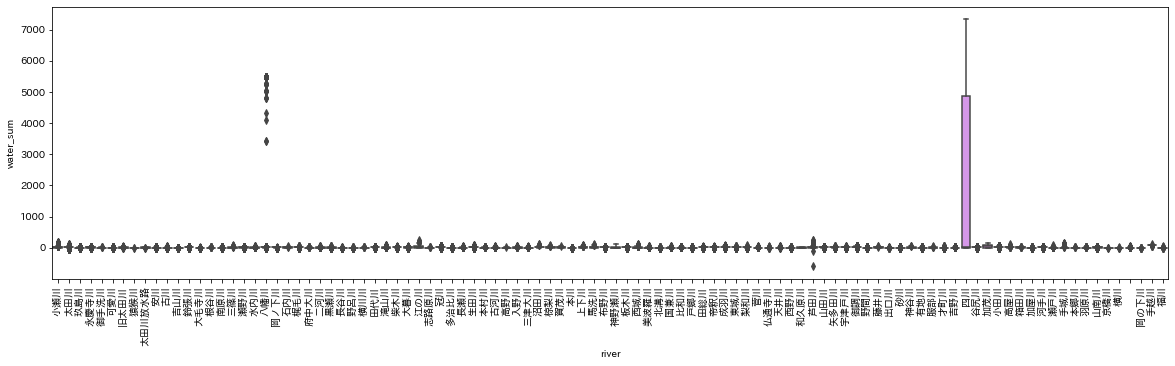

In [8]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'river', y = 'water_sum')
plt.xticks(rotation = 90)
plt.show()

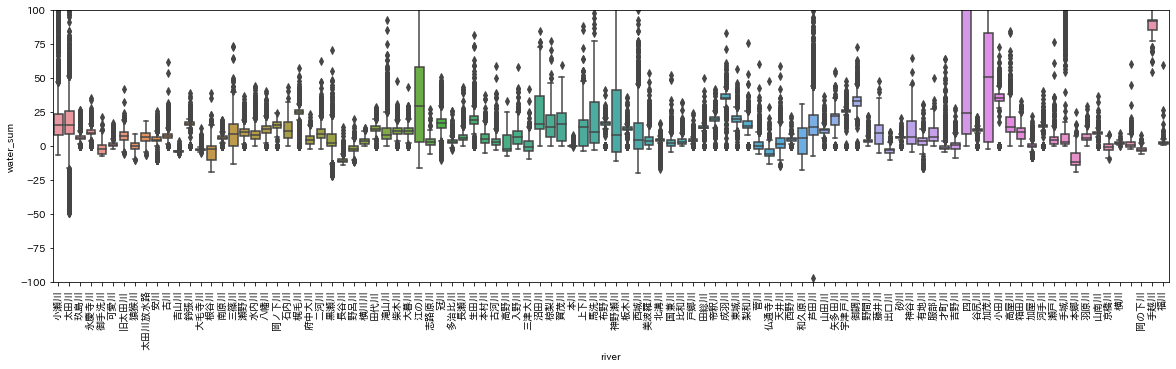

In [9]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'river', y = 'water_sum')
plt.xticks(rotation = 90)
plt.ylim(-100, 100)
plt.show()

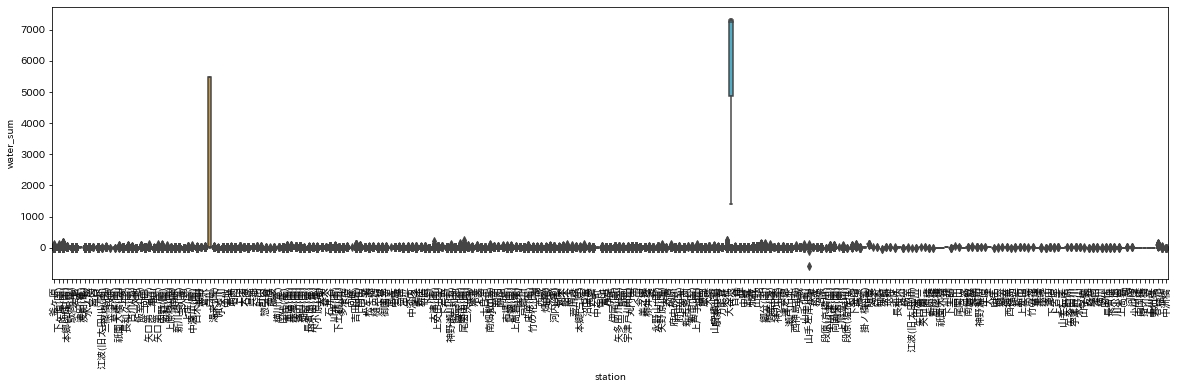

In [10]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'station', y = 'water_sum')
plt.xticks(rotation = 90)
plt.show()

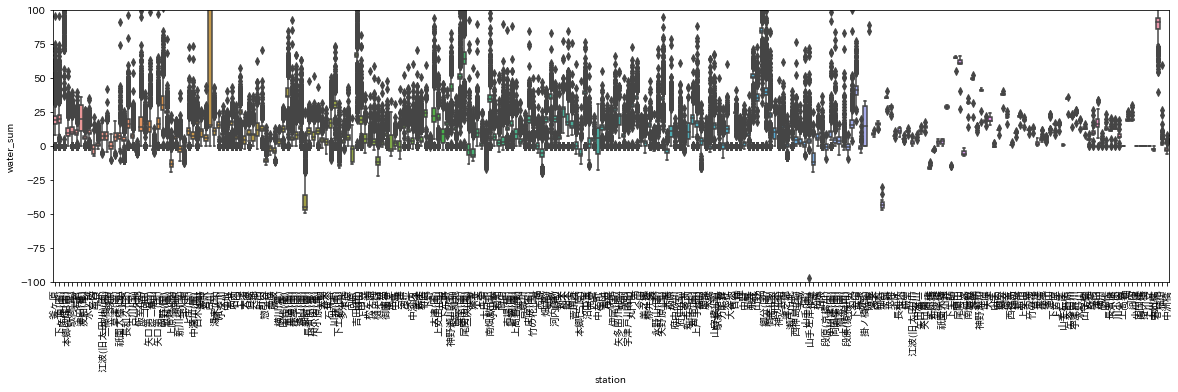

In [11]:
plt.figure(figsize = (20, 5))
sns.boxplot(data = eda_water_data, x = 'station', y = 'water_sum')
plt.xticks(rotation = 90)
plt.ylim(-100, 100)
plt.show()

In [12]:
eda_water_data.describe()

,date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
count,392066.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392063.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392066.000000,392063.000000
mean,1094.817862,2.306785,2.299366,2.275066,2.281411,2.286186,2.283432,2.285574,2.287497,2.295082,2.295695,2.282664,2.285486,2.286224,2.282254,2.271217,2.275475,2.265597,2.278693,2.276737,2.281540,2.290334,2.309045,2.309504,2.305649,54.896705
std,632.508733,21.886215,21.870401,21.791243,21.863007,21.910302,21.895941,21.893927,21.869310,21.875315,21.873893,21.803760,21.836594,21.854108,21.866488,21.861474,21.911499,21.859137,21.907511,21.854689,21.827697,21.831656,21.891874,21.873305,21.847046,521.395317
min,0.000000,-99.990000,-2.040000,-2.050000,-2.060000,-2.130000,-2.150000,-2.040000,-2.040000,-2.050000,-2.050000,-2.050000,-2.090000,-2.060000,-2.060000,-2.070000,-2.080000,-2.080000,-2.060000,-99.990000,-99.990000,-99.980000,-99.980000,-99.980000,-99.980000,-598.750000
25%,547.000000,0.060000,0.060000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.040000,0.030000,0.030000,0.030000,0.020000,0.020000,0.020000,0.030000,0.040000,0.040000,0.050000,0.050000,0.060000,0.060000,0.060000,1.750000
50%,1095.000000,0.390000,0.390000,0.380000,0.370000,0.370000,0.370000,0.380000,0.380000,0.380000,0.380000,0.370000,0.370000,0.370000,0.360000,0.360000,0.360000,0.360000,0.370000,0.370000,0.380000,0.380000,0.390000,0.390000,0.390000,9.050000
75%,1643.000000,0.760000,0.750000,0.740000,0.730000,0.730000,0.730000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000,0.740000,0.730000,0.730000,0.720000,0.720000,0.730000,0.740000,0.740000,0.750000,0.760000,0.760000,0.760000,17.240000
max,2190.000000,305.470000,305.420000,305.370000,305.330000,305.310000,305.300000,305.330000,305.380000,305.390000,305.370000,305.340000,305.300000,305.280000,305.250000,305.240000,305.220000,305.210000,305.230000,305.270000,305.340000,305.390000,305.430000,305.510000,305.520000,7326.790000


In [13]:
eda_water_data[eda_water_data['00:00:00'] >= 100]

,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
36,0,白川,八幡川,228.04,228.04,228.04,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,5472.75
157,0,大谷池,四川,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.16,305.15,305.16,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,7323.73
215,1,白川,八幡川,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.03,5472.72
336,1,大谷池,四川,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,305.15,7323.60
394,2,白川,八幡川,228.03,228.03,228.03,228.03,228.03,228.03,228.03,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,228.02,5472.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391204,2186,大谷池,四川,302.19,302.19,302.19,302.20,302.19,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,7252.76
391383,2187,大谷池,四川,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.20,302.21,7252.81
391562,2188,大谷池,四川,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,302.21,7253.04
391741,2189,大谷池,四川,302.21,302.21,302.21,302.21,302.21,302.22,302.22,302.22,302.22,302.22,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,302.23,7253.37


In [14]:
eda_water_data[eda_water_data['00:00:00'] <= -90]

,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
16822,93,山手左岸(国),芦田川,-99.99,0.0,0.03,0.11,0.17,0.18,0.19,0.19,0.17,0.14,0.12,0.13,0.1,0.12,0.11,0.11,0.13,0.12,0.12,0.13,0.13,0.13,0.13,0.13,-97.1


In [15]:
eda_water_data[eda_water_data['23:00:00'] <= -90]

,date,station,river,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,water_sum
16643,92,山手左岸(国),芦田川,0.08,0.06,0.06,0.07,0.08,0.09,0.1,0.1,0.1,0.1,0.1,0.1,0.05,0.03,0.02,0.01,0.0,0.0,-99.99,-99.99,-99.98,-99.98,-99.98,-99.98,-598.75


In [16]:
exception_river_list = ['四川', '八幡川', '芦田川']

In [17]:
import itertools
import tqdm
import time

In [18]:
print(water_stations.shape)
stations_info_df = water_stations[water_stations['評価対象'] == 1][['観測所名称', '緯度', '経度']].drop_duplicates()
print(stations_info_df.shape)

(180, 12)
(166, 3)


In [19]:
def calc_rain_place(df):
    
    calc_df = rain_stations[rain_stations['入力時使用'] == 1].copy()
    calc_df['calc_緯度'] = df['緯度']
    calc_df['calc_経度'] = df['経度']
    
    calc_df['diff_place'] = np.sqrt((calc_df['緯度'] - calc_df['calc_緯度'])**2 + (calc_df['経度'] - calc_df['calc_経度'])**2) 
    
    nearest_place = calc_df['diff_place'].min()
    calc_df = calc_df[calc_df['diff_place'] == nearest_place].reset_index(drop = True)
 
    return calc_df.loc[0, '観測所名称']

In [20]:
def calc_tide_place(df):
    
    calc_df = tide_stations[tide_stations['入力時使用'] == 1].copy()
    calc_df['calc_緯度'] = df['緯度']
    calc_df['calc_経度'] = df['経度']
    
    calc_df['diff_place'] = np.sqrt((calc_df['緯度'] - calc_df['calc_緯度'])**2 + (calc_df['経度'] - calc_df['calc_経度'])**2) 
    
    nearest_place = calc_df['diff_place'].min()
    calc_df = calc_df[calc_df['diff_place'] == nearest_place].reset_index(drop = True)
 
    return calc_df.loc[0, '観測所名']

In [21]:
def calc_dam_place(df):
    
    calc_df = dam.copy()
    calc_df['calc_緯度'] = df['緯度']
    calc_df['calc_経度'] = df['経度']
    
    calc_df['diff_place'] = np.sqrt((calc_df['緯度'] - calc_df['calc_緯度'])**2 + (calc_df['経度'] - calc_df['calc_経度'])**2) 
    
    nearest_place = calc_df['diff_place'].min()
    calc_df = calc_df[calc_df['diff_place'] == nearest_place].reset_index(drop = True)
 
    return calc_df.loc[0, 'ダム名']

In [22]:
stations_info_df['rain_station'] = stations_info_df.apply(calc_rain_place, axis = 1)

In [23]:
stations_info_df['tide_station'] = stations_info_df.apply(calc_tide_place, axis = 1)

In [24]:
stations_info_df['dam_station'] = stations_info_df.apply(calc_dam_place, axis = 1)

In [25]:
stations_info_df.head()

,観測所名称,緯度,経度,rain_station,tide_station,dam_station
0,多治比,34.681944,132.667222,多治比,広島港,福富ダム
1,南原,34.540556,132.501389,南原(国),広島港,梶毛ダム
2,向原,34.607306,132.703333,向原坂,竹原港,福富ダム
3,上甲立,34.708333,132.739444,下甲立,竹原港,福富ダム
4,上安,34.469306,132.460000,高瀬(国),広島港,梶毛ダム


In [26]:
use_stations = stations_info_df['観測所名称'].unique()

In [27]:
model_data = water_data[water_data['station'].isin(use_stations)].copy()
model_data = model_data.rename(columns = {'station':'water_station'})
for hour in hour_list:
    model_data = model_data.rename(columns = {hour:'water_' + hour})

In [28]:
print(model_data.shape)

model_data = pd.merge(
    model_data,
    stations_info_df[['観測所名称', 'rain_station', 'tide_station', 'dam_station']],
    left_on = 'water_station',
    right_on = '観測所名称',
    how = 'left'
)
print(model_data.shape)

tmp_rain_data = rain_data.copy()
for hour in hour_list:
    tmp_rain_data = tmp_rain_data.rename(columns = {hour:'rain_' + hour})

model_data = pd.merge(
    model_data,
    tmp_rain_data.rename(columns = {'station':'rain_station'}).drop(columns = 'city'),
    left_on = ['rain_station', 'date'],
    right_on = ['rain_station', 'date'],
    how = 'left'
)

del tmp_rain_data

print(model_data.shape)
display(model_data.head())

tmp_tide_data = tide_data.copy()
for hour in hour_list:
    tmp_tide_data = tmp_tide_data.rename(columns = {hour:'tide_' + hour})

model_data = pd.merge(
    model_data,
    tmp_tide_data.rename(columns = {'station':'tide_station'}).drop(columns = 'city'),
    left_on = ['tide_station', 'date'],
    right_on = ['tide_station', 'date'],
    how = 'left'
)

del tmp_tide_data

print(model_data.shape)
display(model_data.head())

model_data = pd.merge(
    model_data,
    dam[[
        'ダム名',
        '完成年月',
        '集水面積_km2',
        '堤体積_千m3', 
        '総貯水容量_千m3', 
        '有効貯水容量_千m3', 
        '型式', 
        '堤高_m',
        '堤頂長_m', 
        '診断結果'
    ]].rename(columns = {'ダム名':'dam_station'}),
    left_on = ['dam_station'],
    right_on = ['dam_station'],
    how = 'left'
)

print(model_data.shape)
display(model_data.head())

(362656, 27)
(362656, 31)
(367359, 55)


,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,釜ヶ原,小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,下ヶ原(国),小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7,防鹿(国),大竹(気),大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,本郷(廿日市),小瀬川,0.31,0.31,0.31,0.32,0.32,0.32,0.31,0.31,0.31,0.31,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,本郷(廿日市),浅原,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,岩倉,小瀬川,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,岩倉,栗栖,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(367359, 79)


,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,釜ヶ原,小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,下ヶ原(国),小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7,防鹿(国),大竹(気),大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
3,0,本郷(廿日市),小瀬川,0.31,0.31,0.31,0.32,0.32,0.32,0.31,0.31,0.31,0.31,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,本郷(廿日市),浅原,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51
4,0,岩倉,小瀬川,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,岩倉,栗栖,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51


(367359, 88)


,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果
0,0,釜ヶ原,小瀬川,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,0.76,釜ヶ原,小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
1,0,下ヶ原(国),小瀬川,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,0.71,下ヶ原(国),小瀬川ダム,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
2,0,防鹿(国),小瀬川,4.71,4.71,4.7,4.7,4.71,4.71,4.71,4.7,4.7,4.7,4.7,4.7,4.7,4.71,4.7,4.7,4.71,4.7,4.7,4.7,4.71,4.7,4.7,4.7,防鹿(国),大竹(気),大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
3,0,本郷(廿日市),小瀬川,0.31,0.31,0.31,0.32,0.32,0.32,0.31,0.31,0.31,0.31,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,0.32,本郷(廿日市),浅原,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C
4,0,岩倉,小瀬川,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,0.27,岩倉,栗栖,大竹港,小瀬川ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,0.8,0.26,0.01,0.26,0.9,1.62,2.31,2.99,3.47,3.53,3.22,2.62,1.99,1.49,1.08,0.96,1.32,1.88,2.43,2.87,3.13,3.07,2.51,S39.6,135.0,96400,11400,9900,重力式コンクリート,49.0,158.0,C


In [29]:
model_data.columns.to_list()

['date',
 'water_station',
 'river',
 'water_00:00:00',
 'water_01:00:00',
 'water_02:00:00',
 'water_03:00:00',
 'water_04:00:00',
 'water_05:00:00',
 'water_06:00:00',
 'water_07:00:00',
 'water_08:00:00',
 'water_09:00:00',
 'water_10:00:00',
 'water_11:00:00',
 'water_12:00:00',
 'water_13:00:00',
 'water_14:00:00',
 'water_15:00:00',
 'water_16:00:00',
 'water_17:00:00',
 'water_18:00:00',
 'water_19:00:00',
 'water_20:00:00',
 'water_21:00:00',
 'water_22:00:00',
 'water_23:00:00',
 '観測所名称',
 'rain_station',
 'tide_station',
 'dam_station',
 'rain_00:00:00',
 'rain_01:00:00',
 'rain_02:00:00',
 'rain_03:00:00',
 'rain_04:00:00',
 'rain_05:00:00',
 'rain_06:00:00',
 'rain_07:00:00',
 'rain_08:00:00',
 'rain_09:00:00',
 'rain_10:00:00',
 'rain_11:00:00',
 'rain_12:00:00',
 'rain_13:00:00',
 'rain_14:00:00',
 'rain_15:00:00',
 'rain_16:00:00',
 'rain_17:00:00',
 'rain_18:00:00',
 'rain_19:00:00',
 'rain_20:00:00',
 'rain_21:00:00',
 'rain_22:00:00',
 'rain_23:00:00',
 'tide_00:00:00

In [30]:
model_data = model_data.sort_values(['water_station', 'date']).reset_index(drop = True)
model_data.head(1)

,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果
0,0,七宝,沼田川,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,七宝,末光,糸崎港,御調ダム,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.43,1.68,0.98,0.41,0.17,0.31,0.77,1.56,2.43,3.14,3.63,3.78,3.53,3.01,2.38,1.69,1.24,1.11,1.34,1.8,2.48,3.06,3.39,3.32,H1.3,54.0,114000,5040,4500,重力式コンクリート,53.1,206.2,C


In [31]:
for kind_data, hour in itertools.product(['water', 'rain', 'tide'], hour_list):
    model_data[kind_data + '_' + hour] = model_data[kind_data + '_' + hour].replace({'M':np.nan, '*':np.nan, '-':np.nan, '--':np.nan, '**':np.nan})
    model_data[kind_data + '_' + hour] = model_data[kind_data + '_' + hour].fillna(model_data[kind_data + '_' + hour].median())
    model_data[kind_data + '_' + hour] = model_data[kind_data + '_' + hour].astype(float)

In [32]:
for hour in hour_list:
    model_data['target_' + hour] = model_data['water_' + hour].shift(-1)

display(model_data.head(1))

,date,water_station,river,water_00:00:00,water_01:00:00,water_02:00:00,water_03:00:00,water_04:00:00,water_05:00:00,water_06:00:00,water_07:00:00,water_08:00:00,water_09:00:00,water_10:00:00,water_11:00:00,water_12:00:00,water_13:00:00,water_14:00:00,water_15:00:00,water_16:00:00,water_17:00:00,water_18:00:00,water_19:00:00,water_20:00:00,water_21:00:00,water_22:00:00,water_23:00:00,観測所名称,rain_station,tide_station,dam_station,rain_00:00:00,rain_01:00:00,rain_02:00:00,rain_03:00:00,rain_04:00:00,rain_05:00:00,rain_06:00:00,rain_07:00:00,rain_08:00:00,rain_09:00:00,rain_10:00:00,rain_11:00:00,rain_12:00:00,rain_13:00:00,rain_14:00:00,rain_15:00:00,rain_16:00:00,rain_17:00:00,rain_18:00:00,rain_19:00:00,rain_20:00:00,rain_21:00:00,rain_22:00:00,rain_23:00:00,tide_00:00:00,tide_01:00:00,tide_02:00:00,tide_03:00:00,tide_04:00:00,tide_05:00:00,tide_06:00:00,tide_07:00:00,tide_08:00:00,tide_09:00:00,tide_10:00:00,tide_11:00:00,tide_12:00:00,tide_13:00:00,tide_14:00:00,tide_15:00:00,tide_16:00:00,tide_17:00:00,tide_18:00:00,tide_19:00:00,tide_20:00:00,tide_21:00:00,tide_22:00:00,tide_23:00:00,完成年月,集水面積_km2,堤体積_千m3,総貯水容量_千m3,有効貯水容量_千m3,型式,堤高_m,堤頂長_m,診断結果,target_00:00:00,target_01:00:00,target_02:00:00,target_03:00:00,target_04:00:00,target_05:00:00,target_06:00:00,target_07:00:00,target_08:00:00,target_09:00:00,target_10:00:00,target_11:00:00,target_12:00:00,target_13:00:00,target_14:00:00,target_15:00:00,target_16:00:00,target_17:00:00,target_18:00:00,target_19:00:00,target_20:00:00,target_21:00:00,target_22:00:00,target_23:00:00
0,0,七宝,沼田川,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,七宝,末光,糸崎港,御調ダム,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.43,1.68,0.98,0.41,0.17,0.31,0.77,1.56,2.43,3.14,3.63,3.78,3.53,3.01,2.38,1.69,1.24,1.11,1.34,1.8,2.48,3.06,3.39,3.32,H1.3,54.0,114000,5040,4500,重力式コンクリート,53.1,206.2,C,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64,1.64


In [33]:
model_data['date'].max()
model_data = model_data[model_data['date'] < model_data['date'].max()]

In [34]:
model_data = model_data[~model_data['river'].isin(exception_river_list)]

In [35]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [36]:
label_cols = [
    'water_station',
    'river',
    '観測所名称',
    'rain_station',
    'tide_station',
    'dam_station',
    '完成年月',
    '型式',
    '診断結果'
]

In [37]:
from sklearn.preprocessing import LabelEncoder
for col in label_cols:
    le = LabelEncoder()
    model_data[col] = le.fit_transform(model_data[col])

In [38]:
model_data.dtypes

date                 int64
water_station        int32
river                int32
water_00:00:00     float64
water_01:00:00     float64
water_02:00:00     float64
water_03:00:00     float64
water_04:00:00     float64
water_05:00:00     float64
water_06:00:00     float64
water_07:00:00     float64
water_08:00:00     float64
water_09:00:00     float64
water_10:00:00     float64
water_11:00:00     float64
water_12:00:00     float64
water_13:00:00     float64
water_14:00:00     float64
water_15:00:00     float64
water_16:00:00     float64
water_17:00:00     float64
water_18:00:00     float64
water_19:00:00     float64
water_20:00:00     float64
water_21:00:00     float64
water_22:00:00     float64
water_23:00:00     float64
観測所名称                int32
rain_station         int32
tide_station         int32
dam_station          int32
rain_00:00:00      float64
rain_01:00:00      float64
rain_02:00:00      float64
rain_03:00:00      float64
rain_04:00:00      float64
rain_05:00:00      float64
r

In [39]:
train = model_data[model_data['date'] <= 1642]
test = model_data[model_data['date'] > 1642]

In [40]:
x_cols = [
#     'water_station',
#     'river',
    'water_00:00:00',
    'water_01:00:00',
    'water_02:00:00',
    'water_03:00:00',
    'water_04:00:00',
    'water_05:00:00',
    'water_06:00:00',
    'water_07:00:00',
    'water_08:00:00',
    'water_09:00:00',
    'water_10:00:00',
    'water_11:00:00',
    'water_12:00:00',
    'water_13:00:00',
    'water_14:00:00',
    'water_15:00:00',
    'water_16:00:00',
    'water_17:00:00',
    'water_18:00:00',
    'water_19:00:00',
    'water_20:00:00',
    'water_21:00:00',
    'water_22:00:00',
    'water_23:00:00',
#     '観測所名称',
#     'rain_station',
#     'tide_station',
#     'dam_station',
#     'rain_00:00:00',
#     'rain_01:00:00',
#     'rain_02:00:00',
#     'rain_03:00:00',
#     'rain_04:00:00',
#     'rain_05:00:00',
#     'rain_06:00:00',
#     'rain_07:00:00',
#     'rain_08:00:00',
#     'rain_09:00:00',
#     'rain_10:00:00',
#     'rain_11:00:00',
#     'rain_12:00:00',
#     'rain_13:00:00',
#     'rain_14:00:00',
#     'rain_15:00:00',
#     'rain_16:00:00',
#     'rain_17:00:00',
#     'rain_18:00:00',
#     'rain_19:00:00',
#     'rain_20:00:00',
#     'rain_21:00:00',
#     'rain_22:00:00',
#     'rain_23:00:00',
#     'tide_00:00:00',
#     'tide_01:00:00',
#     'tide_02:00:00',
#     'tide_03:00:00',
#     'tide_04:00:00',
#     'tide_05:00:00',
#     'tide_06:00:00',
#     'tide_07:00:00',
#     'tide_08:00:00',
#     'tide_09:00:00',
#     'tide_10:00:00',
#     'tide_11:00:00',
#     'tide_12:00:00',
#     'tide_13:00:00',
#     'tide_14:00:00',
#     'tide_15:00:00',
#     'tide_16:00:00',
#     'tide_17:00:00',
#     'tide_18:00:00',
#     'tide_19:00:00',
#     'tide_20:00:00',
#     'tide_21:00:00',
#     'tide_22:00:00',
#     'tide_23:00:00',
#     '完成年月',
#     '集水面積_km2',
#     '堤体積_千m3',
#     '総貯水容量_千m3',
#     '有効貯水容量_千m3',
#     '型式',
#     '堤高_m',
#     '堤頂長_m',
#     '診断結果'
]

y_cols = [ 
    'target_00:00:00',
    'target_01:00:00',
    'target_02:00:00',
    'target_03:00:00',
    'target_04:00:00',
    'target_05:00:00',
    'target_06:00:00',
    'target_07:00:00',
    'target_08:00:00',
    'target_09:00:00',
    'target_10:00:00',
    'target_11:00:00',
    'target_12:00:00',
    'target_13:00:00',
    'target_14:00:00',
    'target_15:00:00',
    'target_16:00:00',
    'target_17:00:00',
    'target_18:00:00',
    'target_19:00:00',
    'target_20:00:00',
    'target_21:00:00',
    'target_22:00:00',
    'target_23:00:00'
]

In [41]:
train_x = train[x_cols]
train_y = train[y_cols]
test_x = test[x_cols]
test_y = test[y_cols]

In [42]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(244246, 24)
(244246, 24)
(81503, 24)
(81503, 24)


In [43]:
from sklearn.linear_model import Ridge

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
import pickle

In [46]:
rmse_list = []

def fit_lgbm(target, train_x, train_y, test_x, test_y, params: dict=None, verbose=100):
        
    oofs_lgbm = []
    models_lgbm = []
    scores_lgbm = []
        
    oof_pred = np.zeros(len(test_y), dtype=np.float32)
    
    trains = lgbm.Dataset(train_x, train_y)
    valids = lgbm.Dataset(test_x, test_y)

    model = lgbm.train(
        params, 
        trains,
        valid_sets = valids,
        num_boost_round = 50000,
        verbose_eval = False,
        early_stopping_rounds = 100
    )

    
    oof_pred = model.predict(test_x)
    rmse = np.sqrt(mean_squared_error(test_y, oof_pred))

    print('*'*50)
    print('*'*50)
    print('*'*50)
    
    print('rmse:', rmse)
    
    print('*'*50)
    print('*'*50)
    print('*'*50)
    
    filename = f'lgbm_model_{target[7:9]}.pkl'
    pickle.dump(model, open(filename, 'wb'))
    
    oofs_lgbm.append(oof_pred)
    models_lgbm.append(model)
    
    return oofs_lgbm, models_lgbm, rmse, model.params

params = {
    'objective':'regression',
    'metric':'rmse'
}

rmse_list = []
params_list = []

for target in y_cols:
    
    oofs_lgbm, models_lgbm, rmse, best_params = fit_lgbm(
        target,
        train_x.values, 
        train_y[target],
        test_x.values,
        test_y[target],
        params
    )
    
    rmse_list.append(rmse)
    params_list.append(best_params)

[I 2022-12-31 11:52:33,248] A new study created in memory with name: no-name-6cb9c884-7569-458d-8769-56010ea0d4a0
feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction, val_score: 0.092419:  14%|######4                                      | 1/7 [00:00<00:05,  1.09it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction, val_score: 0.090697:  29%|############8                                | 2/7 [00:01<00:04,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction, val_score: 0.090697:  43%|###################2                         | 3/7 [00:02<00:04,  1.00s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction, val_score: 0.090697:  57%|#########################7                   | 4/7 [00:04<00:03,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction, val_score: 0.090697:  71%|################################1            | 5/7 [00:04<00:01,  1.05it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction, val_score: 0.090697:  86%|######################################5      | 6/7 [00:05<00:00,  1.08it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:   5%|##5                                               | 1/20 [00:00<00:18,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  10%|#####                                             | 2/20 [00:02<00:22,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  15%|#######5                                          | 3/20 [00:04<00:26,  1.55s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  20%|##########                                        | 4/20 [00:05<00:22,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010510 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  25%|############5                                     | 5/20 [00:06<00:19,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  30%|###############                                   | 6/20 [00:08<00:22,  1.60s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  35%|#################5                                | 7/20 [00:10<00:19,  1.51s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  40%|####################                              | 8/20 [00:11<00:18,  1.55s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010501 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  45%|######################5                           | 9/20 [00:13<00:17,  1.61s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  50%|########################5                        | 10/20 [00:15<00:17,  1.75s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  55%|##########################9                      | 11/20 [00:17<00:17,  1.93s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  60%|#############################4                   | 12/20 [00:18<00:13,  1.63s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  65%|###############################8                 | 13/20 [00:19<00:09,  1.43s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  70%|##################################3              | 14/20 [00:21<00:08,  1.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  75%|####################################7            | 15/20 [00:22<00:06,  1.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  80%|#######################################2         | 16/20 [00:23<00:05,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  85%|#########################################6       | 17/20 [00:25<00:04,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  90%|############################################1    | 18/20 [00:26<00:02,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


num_leaves, val_score: 0.090697:  95%|##############################################5  | 19/20 [00:27<00:01,  1.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


bagging, val_score: 0.090697:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


bagging, val_score: 0.090697:  10%|#####3                                               | 1/10 [00:00<00:08,  1.10it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


bagging, val_score: 0.090697:  20%|##########6                                          | 2/10 [00:01<00:07,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


bagging, val_score: 0.090697:  30%|###############9                                     | 3/10 [00:02<00:06,  1.04it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


bagging, val_score: 0.090697:  40%|#####################2                               | 4/10 [00:03<00:05,  1.07it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


bagging, val_score: 0.090674:  50%|##########################5                          | 5/10 [00:04<00:04,  1.04it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


bagging, val_score: 0.090674:  60%|###############################8                     | 6/10 [00:05<00:04,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


bagging, val_score: 0.090419:  70%|#####################################                | 7/10 [00:07<00:03,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


bagging, val_score: 0.090419:  80%|##########################################4          | 8/10 [00:08<00:02,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


bagging, val_score: 0.090419:  90%|###############################################7     | 9/10 [00:09<00:01,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010996 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction_stage2, val_score: 0.090419:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction_stage2, val_score: 0.090419:  17%|######3                               | 1/6 [00:01<00:05,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction_stage2, val_score: 0.090419:  33%|############6                         | 2/6 [00:02<00:04,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction_stage2, val_score: 0.090419:  50%|###################                   | 3/6 [00:03<00:03,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction_stage2, val_score: 0.090419:  67%|#########################3            | 4/6 [00:04<00:02,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


feature_fraction_stage2, val_score: 0.090419:  83%|###############################6      | 5/6 [00:05<00:01,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.090419:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.090122:   5%|#9                                    | 1/20 [00:01<00:19,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089965:  10%|###8                                  | 2/20 [00:02<00:18,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089965:  15%|#####7                                | 3/20 [00:03<00:17,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089965:  20%|#######6                              | 4/20 [00:04<00:16,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089965:  25%|#########5                            | 5/20 [00:05<00:15,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089965:  30%|###########4                          | 6/20 [00:06<00:14,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089930:  35%|#############3                        | 7/20 [00:07<00:13,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089930:  40%|###############2                      | 8/20 [00:08<00:12,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089930:  45%|#################1                    | 9/20 [00:09<00:11,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089930:  50%|##################5                  | 10/20 [00:10<00:10,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089930:  55%|####################3                | 11/20 [00:11<00:09,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089930:  60%|######################2              | 12/20 [00:12<00:08,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089930:  65%|########################             | 13/20 [00:13<00:07,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089930:  70%|#########################9           | 14/20 [00:14<00:06,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.089930:  75%|###########################7         | 15/20 [00:15<00:05,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.088755:  80%|#############################6       | 16/20 [00:16<00:04,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.088755:  85%|###############################4     | 17/20 [00:17<00:03,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.088755:  90%|#################################3   | 18/20 [00:18<00:02,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


regularization_factors, val_score: 0.088755:  95%|###################################1 | 19/20 [00:19<00:01,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


min_data_in_leaf, val_score: 0.088755:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


min_data_in_leaf, val_score: 0.088755:  20%|#########                                    | 1/5 [00:02<00:10,  2.53s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


min_data_in_leaf, val_score: 0.088679:  40%|##################                           | 2/5 [00:03<00:05,  1.82s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


min_data_in_leaf, val_score: 0.088502:  60%|###########################                  | 3/5 [00:06<00:04,  2.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


min_data_in_leaf, val_score: 0.088502:  80%|####################################         | 4/5 [00:07<00:01,  1.75s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.524041


min_data_in_leaf, val_score: 0.088502: 100%|#############################################| 5/5 [00:08<00:00,  1.76s/it]
[I 2022-12-31 11:53:54,659] A new study created in memory with name: no-name-b1c79b47-bc06-4ee9-af74-0c0a526581b3


**************************************************
**************************************************
**************************************************
rmse: 0.08850195714909212
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction, val_score: 0.098552:  14%|######4                                      | 1/7 [00:01<00:06,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction, val_score: 0.097731:  29%|############8                                | 2/7 [00:02<00:05,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction, val_score: 0.097731:  43%|###################2                         | 3/7 [00:03<00:04,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction, val_score: 0.097731:  57%|#########################7                   | 4/7 [00:04<00:03,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction, val_score: 0.097731:  71%|################################1            | 5/7 [00:05<00:02,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction, val_score: 0.097707:  86%|######################################5      | 6/7 [00:06<00:01,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.097707:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.097707:   5%|##5                                               | 1/20 [00:01<00:29,  1.54s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.097707:  10%|#####                                             | 2/20 [00:03<00:33,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.097707:  15%|#######5                                          | 3/20 [00:05<00:28,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.097707:  20%|##########                                        | 4/20 [00:07<00:30,  1.88s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.097659:  25%|############5                                     | 5/20 [00:08<00:23,  1.57s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.097659:  30%|###############                                   | 6/20 [00:09<00:19,  1.39s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.097659:  35%|#################5                                | 7/20 [00:11<00:20,  1.57s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.097659:  40%|####################                              | 8/20 [00:12<00:17,  1.47s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.097659:  45%|######################5                           | 9/20 [00:13<00:14,  1.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.097659:  50%|########################5                        | 10/20 [00:14<00:13,  1.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.096854:  55%|##########################9                      | 11/20 [00:16<00:11,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.096854:  60%|#############################4                   | 12/20 [00:17<00:09,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.096854:  65%|###############################8                 | 13/20 [00:18<00:08,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.096385:  70%|##################################3              | 14/20 [00:19<00:07,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.096385:  75%|####################################7            | 15/20 [00:21<00:07,  1.45s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.096385:  80%|#######################################2         | 16/20 [00:22<00:05,  1.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.096385:  85%|#########################################6       | 17/20 [00:25<00:04,  1.66s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.096385:  90%|############################################1    | 18/20 [00:27<00:03,  1.83s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


num_leaves, val_score: 0.096385:  95%|##############################################5  | 19/20 [00:28<00:01,  1.59s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


bagging, val_score: 0.096385:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


bagging, val_score: 0.096385:  10%|#####3                                               | 1/10 [00:01<00:09,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


bagging, val_score: 0.096385:  20%|##########6                                          | 2/10 [00:02<00:08,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


bagging, val_score: 0.096385:  30%|###############9                                     | 3/10 [00:03<00:08,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013376 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


bagging, val_score: 0.096385:  40%|#####################2                               | 4/10 [00:05<00:07,  1.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


bagging, val_score: 0.096385:  50%|##########################5                          | 5/10 [00:06<00:06,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


bagging, val_score: 0.096385:  60%|###############################8                     | 6/10 [00:07<00:04,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


bagging, val_score: 0.096385:  70%|#####################################                | 7/10 [00:08<00:03,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


bagging, val_score: 0.096385:  80%|##########################################4          | 8/10 [00:09<00:02,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


bagging, val_score: 0.096385:  90%|###############################################7     | 9/10 [00:10<00:01,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction_stage2, val_score: 0.096385:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction_stage2, val_score: 0.096385:  17%|######3                               | 1/6 [00:01<00:05,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction_stage2, val_score: 0.096385:  33%|############6                         | 2/6 [00:02<00:04,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction_stage2, val_score: 0.096385:  50%|###################                   | 3/6 [00:03<00:03,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction_stage2, val_score: 0.096304:  67%|#########################3            | 4/6 [00:04<00:02,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


feature_fraction_stage2, val_score: 0.096304:  83%|###############################6      | 5/6 [00:05<00:01,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.096304:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.096304:   5%|#9                                    | 1/20 [00:01<00:19,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.096304:  10%|###8                                  | 2/20 [00:02<00:18,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.096304:  15%|#####7                                | 3/20 [00:03<00:17,  1.00s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.096304:  20%|#######6                              | 4/20 [00:04<00:16,  1.00s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.096203:  25%|#########5                            | 5/20 [00:05<00:16,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.096203:  30%|###########4                          | 6/20 [00:06<00:14,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.096203:  35%|#############3                        | 7/20 [00:07<00:14,  1.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.096203:  40%|###############2                      | 8/20 [00:08<00:13,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.096203:  45%|#################1                    | 9/20 [00:09<00:11,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.096203:  50%|##################5                  | 10/20 [00:10<00:11,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.095556:  55%|####################3                | 11/20 [00:13<00:14,  1.58s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.095055:  60%|######################2              | 12/20 [00:16<00:16,  2.07s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.095055:  65%|########################             | 13/20 [00:18<00:14,  2.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.095055:  70%|#########################9           | 14/20 [00:19<00:10,  1.81s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.095055:  75%|###########################7         | 15/20 [00:21<00:08,  1.63s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.095055:  80%|#############################6       | 16/20 [00:22<00:05,  1.47s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.095055:  85%|###############################4     | 17/20 [00:25<00:05,  1.96s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

regularization_factors, val_score: 0.095055:  90%|#################################3   | 18/20 [00:26<00:03,  1.77s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


regularization_factors, val_score: 0.095055:  95%|###################################1 | 19/20 [00:27<00:01,  1.60s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


min_data_in_leaf, val_score: 0.095055:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


min_data_in_leaf, val_score: 0.094903:  20%|#########                                    | 1/5 [00:02<00:09,  2.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


min_data_in_leaf, val_score: 0.094903:  40%|##################                           | 2/5 [00:04<00:06,  2.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


min_data_in_leaf, val_score: 0.094868:  60%|###########################                  | 3/5 [00:07<00:04,  2.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011951 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


min_data_in_leaf, val_score: 0.094868:  80%|####################################         | 4/5 [00:09<00:02,  2.46s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.517277


min_data_in_leaf, val_score: 0.094868: 100%|#############################################| 5/5 [00:12<00:00,  2.50s/it]
[I 2022-12-31 11:55:33,024] A new study created in memory with name: no-name-e07c076b-918d-4ba8-b848-06d3d04adc37


**************************************************
**************************************************
**************************************************
rmse: 0.09486800701047456
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction, val_score: 0.111585:  14%|######4                                      | 1/7 [00:01<00:07,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction, val_score: 0.111585:  29%|############8                                | 2/7 [00:02<00:04,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction, val_score: 0.111585:  43%|###################2                         | 3/7 [00:03<00:04,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction, val_score: 0.111585:  57%|#########################7                   | 4/7 [00:04<00:02,  1.00it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction, val_score: 0.111585:  71%|################################1            | 5/7 [00:05<00:02,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction, val_score: 0.111585:  86%|######################################5      | 6/7 [00:06<00:01,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:   5%|##5                                               | 1/20 [00:02<00:39,  2.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:  10%|#####                                             | 2/20 [00:03<00:30,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:  15%|#######5                                          | 3/20 [00:05<00:28,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:  20%|##########                                        | 4/20 [00:07<00:30,  1.91s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:  25%|############5                                     | 5/20 [00:09<00:29,  1.98s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:  30%|###############                                   | 6/20 [00:10<00:22,  1.64s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:  35%|#################5                                | 7/20 [00:12<00:24,  1.89s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:  40%|####################                              | 8/20 [00:14<00:22,  1.89s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:  45%|######################5                           | 9/20 [00:16<00:20,  1.87s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:  50%|########################5                        | 10/20 [00:18<00:17,  1.74s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:  55%|##########################9                      | 11/20 [00:23<00:27,  3.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111585:  60%|#############################4                   | 12/20 [00:25<00:20,  2.57s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111321:  65%|###############################8                 | 13/20 [00:26<00:14,  2.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111321:  70%|##################################3              | 14/20 [00:27<00:10,  1.80s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111321:  75%|####################################7            | 15/20 [00:28<00:07,  1.56s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111321:  80%|#######################################2         | 16/20 [00:30<00:06,  1.55s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111321:  85%|#########################################6       | 17/20 [00:31<00:04,  1.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111321:  90%|############################################1    | 18/20 [00:32<00:02,  1.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


num_leaves, val_score: 0.111321:  95%|##############################################5  | 19/20 [00:33<00:01,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


bagging, val_score: 0.111247:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


bagging, val_score: 0.111247:  10%|#####3                                               | 1/10 [00:00<00:07,  1.21it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


bagging, val_score: 0.111247:  20%|##########6                                          | 2/10 [00:01<00:06,  1.27it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


bagging, val_score: 0.111247:  30%|###############9                                     | 3/10 [00:02<00:06,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


bagging, val_score: 0.111247:  40%|#####################2                               | 4/10 [00:03<00:06,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


bagging, val_score: 0.111247:  50%|##########################5                          | 5/10 [00:04<00:05,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


bagging, val_score: 0.111247:  60%|###############################8                     | 6/10 [00:06<00:04,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


bagging, val_score: 0.111247:  70%|#####################################                | 7/10 [00:06<00:03,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


bagging, val_score: 0.111247:  80%|##########################################4          | 8/10 [00:07<00:01,  1.05it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


bagging, val_score: 0.111247:  90%|###############################################7     | 9/10 [00:08<00:01,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction_stage2, val_score: 0.111247:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction_stage2, val_score: 0.111247:  17%|######3                               | 1/6 [00:01<00:05,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction_stage2, val_score: 0.110755:  33%|############6                         | 2/6 [00:02<00:04,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction_stage2, val_score: 0.110755:  50%|###################                   | 3/6 [00:03<00:03,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction_stage2, val_score: 0.110755:  67%|#########################3            | 4/6 [00:04<00:02,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


feature_fraction_stage2, val_score: 0.110755:  83%|###############################6      | 5/6 [00:05<00:01,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.110755:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.110755:   5%|#9                                    | 1/20 [00:01<00:22,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.110755:  10%|###8                                  | 2/20 [00:02<00:22,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.110755:  15%|#####7                                | 3/20 [00:03<00:21,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.110520:  20%|#######6                              | 4/20 [00:04<00:20,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.110520:  25%|#########5                            | 5/20 [00:06<00:18,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.110520:  30%|###########4                          | 6/20 [00:07<00:18,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.110520:  35%|#############3                        | 7/20 [00:08<00:17,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.110520:  40%|###############2                      | 8/20 [00:09<00:14,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.110520:  45%|#################1                    | 9/20 [00:11<00:13,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.110520:  50%|##################5                  | 10/20 [00:12<00:11,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.109536:  55%|####################3                | 11/20 [00:14<00:14,  1.58s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.109536:  60%|######################2              | 12/20 [00:16<00:12,  1.52s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.109536:  65%|########################             | 13/20 [00:17<00:09,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.109536:  70%|#########################9           | 14/20 [00:19<00:10,  1.68s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.109536:  75%|###########################7         | 15/20 [00:21<00:08,  1.77s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.109536:  80%|#############################6       | 16/20 [00:22<00:06,  1.54s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.109536:  85%|###############################4     | 17/20 [00:24<00:05,  1.74s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.109536:  90%|#################################3   | 18/20 [00:25<00:03,  1.56s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


regularization_factors, val_score: 0.109536:  95%|###################################1 | 19/20 [00:27<00:01,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


min_data_in_leaf, val_score: 0.109536:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


min_data_in_leaf, val_score: 0.109536:  20%|#########                                    | 1/5 [00:02<00:08,  2.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010859 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


min_data_in_leaf, val_score: 0.109458:  40%|##################                           | 2/5 [00:04<00:06,  2.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


min_data_in_leaf, val_score: 0.109458:  60%|###########################                  | 3/5 [00:05<00:03,  1.82s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


min_data_in_leaf, val_score: 0.109458:  80%|####################################         | 4/5 [00:07<00:01,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.509414


min_data_in_leaf, val_score: 0.109262: 100%|#############################################| 5/5 [00:08<00:00,  1.80s/it]
[I 2022-12-31 11:57:09,478] A new study created in memory with name: no-name-6c0c4033-da26-4c59-b4a4-e301ac189380


**************************************************
**************************************************
**************************************************
rmse: 0.10926235606536885
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction, val_score: 0.111397:  14%|######4                                      | 1/7 [00:01<00:07,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction, val_score: 0.111397:  29%|############8                                | 2/7 [00:02<00:05,  1.14s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction, val_score: 0.111397:  43%|###################2                         | 3/7 [00:03<00:05,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction, val_score: 0.110081:  57%|#########################7                   | 4/7 [00:04<00:03,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction, val_score: 0.110081:  71%|################################1            | 5/7 [00:06<00:02,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction, val_score: 0.110081:  86%|######################################5      | 6/7 [00:07<00:01,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.110081:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.110081:   5%|##5                                               | 1/20 [00:01<00:36,  1.94s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.110081:  10%|#####                                             | 2/20 [00:03<00:36,  2.00s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.110081:  15%|#######5                                          | 3/20 [00:06<00:34,  2.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  20%|##########                                        | 4/20 [00:07<00:27,  1.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  25%|############5                                     | 5/20 [00:08<00:23,  1.58s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  30%|###############                                   | 6/20 [00:09<00:20,  1.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  35%|#################5                                | 7/20 [00:11<00:20,  1.59s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  40%|####################                              | 8/20 [00:14<00:22,  1.85s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  45%|######################5                           | 9/20 [00:15<00:19,  1.74s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  50%|########################5                        | 10/20 [00:16<00:15,  1.57s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  55%|##########################9                      | 11/20 [00:19<00:16,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  60%|#############################4                   | 12/20 [00:25<00:26,  3.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  65%|###############################8                 | 13/20 [00:27<00:20,  2.86s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  70%|##################################3              | 14/20 [00:28<00:13,  2.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  75%|####################################7            | 15/20 [00:29<00:09,  1.91s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  80%|#######################################2         | 16/20 [00:31<00:07,  1.80s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  85%|#########################################6       | 17/20 [00:32<00:04,  1.62s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  90%|############################################1    | 18/20 [00:34<00:03,  1.62s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


num_leaves, val_score: 0.109782:  95%|##############################################5  | 19/20 [00:35<00:01,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


bagging, val_score: 0.109782:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


bagging, val_score: 0.109782:  10%|#####3                                               | 1/10 [00:01<00:10,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


bagging, val_score: 0.109782:  20%|##########6                                          | 2/10 [00:02<00:08,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


bagging, val_score: 0.109782:  30%|###############9                                     | 3/10 [00:03<00:06,  1.00it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


bagging, val_score: 0.109782:  40%|#####################2                               | 4/10 [00:04<00:05,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


bagging, val_score: 0.109782:  50%|##########################5                          | 5/10 [00:05<00:05,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


bagging, val_score: 0.109782:  60%|###############################8                     | 6/10 [00:06<00:04,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


bagging, val_score: 0.109782:  70%|#####################################                | 7/10 [00:07<00:03,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


bagging, val_score: 0.109782:  80%|##########################################4          | 8/10 [00:08<00:02,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


bagging, val_score: 0.109782:  90%|###############################################7     | 9/10 [00:09<00:01,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction_stage2, val_score: 0.109782:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction_stage2, val_score: 0.109782:  17%|######3                               | 1/6 [00:01<00:06,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction_stage2, val_score: 0.109579:  33%|############6                         | 2/6 [00:02<00:04,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction_stage2, val_score: 0.109579:  50%|###################                   | 3/6 [00:03<00:03,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction_stage2, val_score: 0.109579:  67%|#########################3            | 4/6 [00:04<00:02,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


feature_fraction_stage2, val_score: 0.109579:  83%|###############################6      | 5/6 [00:05<00:01,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.109579:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108982:   5%|#9                                    | 1/20 [00:01<00:28,  1.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108982:  10%|###8                                  | 2/20 [00:02<00:24,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108982:  15%|#####7                                | 3/20 [00:03<00:22,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108982:  20%|#######6                              | 4/20 [00:05<00:21,  1.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108982:  25%|#########5                            | 5/20 [00:06<00:19,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108811:  30%|###########4                          | 6/20 [00:08<00:21,  1.56s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108811:  35%|#############3                        | 7/20 [00:09<00:18,  1.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108811:  40%|###############2                      | 8/20 [00:11<00:16,  1.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108811:  45%|#################1                    | 9/20 [00:12<00:14,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108811:  50%|##################5                  | 10/20 [00:13<00:12,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108811:  55%|####################3                | 11/20 [00:14<00:11,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108798:  60%|######################2              | 12/20 [00:16<00:11,  1.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108256:  65%|########################             | 13/20 [00:19<00:13,  1.87s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108256:  70%|#########################9           | 14/20 [00:20<00:10,  1.69s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108256:  75%|###########################7         | 15/20 [00:22<00:08,  1.62s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108256:  80%|#############################6       | 16/20 [00:25<00:08,  2.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108256:  85%|###############################4     | 17/20 [00:27<00:05,  2.00s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108256:  90%|#################################3   | 18/20 [00:28<00:03,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


regularization_factors, val_score: 0.108256:  95%|###################################1 | 19/20 [00:30<00:01,  1.67s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


min_data_in_leaf, val_score: 0.108256:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


min_data_in_leaf, val_score: 0.108256:  20%|#########                                    | 1/5 [00:02<00:11,  2.94s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


min_data_in_leaf, val_score: 0.108256:  40%|##################                           | 2/5 [00:06<00:09,  3.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


min_data_in_leaf, val_score: 0.108137:  60%|###########################                  | 3/5 [00:09<00:06,  3.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


min_data_in_leaf, val_score: 0.108137:  80%|####################################         | 4/5 [00:10<00:02,  2.46s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.502732


min_data_in_leaf, val_score: 0.108137: 100%|#############################################| 5/5 [00:13<00:00,  2.73s/it]
[I 2022-12-31 11:58:57,774] A new study created in memory with name: no-name-b55ba47c-3f72-49cc-b1c9-d25893cea62e


**************************************************
**************************************************
**************************************************
rmse: 0.10813687015658331
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction, val_score: 0.107196:  14%|######4                                      | 1/7 [00:01<00:06,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction, val_score: 0.107196:  29%|############8                                | 2/7 [00:02<00:05,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction, val_score: 0.106913:  43%|###################2                         | 3/7 [00:03<00:04,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction, val_score: 0.106382:  57%|#########################7                   | 4/7 [00:04<00:03,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction, val_score: 0.106382:  71%|################################1            | 5/7 [00:05<00:02,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction, val_score: 0.106382:  86%|######################################5      | 6/7 [00:07<00:01,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:   5%|##5                                               | 1/20 [00:01<00:19,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  10%|#####                                             | 2/20 [00:02<00:24,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  15%|#######5                                          | 3/20 [00:04<00:30,  1.80s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  20%|##########                                        | 4/20 [00:07<00:32,  2.00s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  25%|############5                                     | 5/20 [00:08<00:25,  1.68s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  30%|###############                                   | 6/20 [00:09<00:23,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  35%|#################5                                | 7/20 [00:11<00:20,  1.55s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  40%|####################                              | 8/20 [00:13<00:21,  1.80s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  45%|######################5                           | 9/20 [00:15<00:21,  1.94s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  50%|########################5                        | 10/20 [00:17<00:18,  1.85s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  55%|##########################9                      | 11/20 [00:25<00:32,  3.63s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011000 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  60%|#############################4                   | 12/20 [00:27<00:25,  3.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  65%|###############################8                 | 13/20 [00:28<00:17,  2.54s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  70%|##################################3              | 14/20 [00:29<00:12,  2.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  75%|####################################7            | 15/20 [00:30<00:09,  1.91s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  80%|#######################################2         | 16/20 [00:32<00:06,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  85%|#########################################6       | 17/20 [00:33<00:05,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  90%|############################################1    | 18/20 [00:35<00:03,  1.62s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


num_leaves, val_score: 0.106382:  95%|##############################################5  | 19/20 [00:36<00:01,  1.54s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


bagging, val_score: 0.106382:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


bagging, val_score: 0.106382:  10%|#####3                                               | 1/10 [00:01<00:13,  1.45s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


bagging, val_score: 0.106382:  20%|##########6                                          | 2/10 [00:02<00:10,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


bagging, val_score: 0.106382:  30%|###############9                                     | 3/10 [00:03<00:09,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


bagging, val_score: 0.106382:  40%|#####################2                               | 4/10 [00:04<00:07,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


bagging, val_score: 0.106382:  50%|##########################5                          | 5/10 [00:06<00:05,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


bagging, val_score: 0.106382:  60%|###############################8                     | 6/10 [00:07<00:04,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


bagging, val_score: 0.106382:  70%|#####################################                | 7/10 [00:08<00:03,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


bagging, val_score: 0.106382:  80%|##########################################4          | 8/10 [00:09<00:02,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


bagging, val_score: 0.106382:  90%|###############################################7     | 9/10 [00:11<00:01,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction_stage2, val_score: 0.106382:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction_stage2, val_score: 0.106382:  17%|######3                               | 1/6 [00:01<00:06,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction_stage2, val_score: 0.106382:  33%|############6                         | 2/6 [00:02<00:05,  1.37s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction_stage2, val_score: 0.106382:  50%|###################                   | 3/6 [00:03<00:03,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction_stage2, val_score: 0.106382:  67%|#########################3            | 4/6 [00:05<00:02,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


feature_fraction_stage2, val_score: 0.106382:  83%|###############################6      | 5/6 [00:06<00:01,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.106382:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.106361:   5%|#9                                    | 1/20 [00:01<00:24,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.106361:  10%|###8                                  | 2/20 [00:02<00:23,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.106361:  15%|#####7                                | 3/20 [00:03<00:20,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.106361:  20%|#######6                              | 4/20 [00:05<00:20,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104821:  25%|#########5                            | 5/20 [00:07<00:23,  1.56s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104821:  30%|###########4                          | 6/20 [00:08<00:20,  1.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104821:  35%|#############3                        | 7/20 [00:09<00:17,  1.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104821:  40%|###############2                      | 8/20 [00:10<00:15,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104821:  45%|#################1                    | 9/20 [00:11<00:14,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104821:  50%|##################5                  | 10/20 [00:13<00:12,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104821:  55%|####################3                | 11/20 [00:14<00:12,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104821:  60%|######################2              | 12/20 [00:17<00:12,  1.62s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011124 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104753:  65%|########################             | 13/20 [00:19<00:12,  1.82s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104753:  70%|#########################9           | 14/20 [00:20<00:09,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104753:  75%|###########################7         | 15/20 [00:21<00:07,  1.55s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104753:  80%|#############################6       | 16/20 [00:23<00:05,  1.50s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104753:  85%|###############################4     | 17/20 [00:24<00:04,  1.46s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104753:  90%|#################################3   | 18/20 [00:25<00:02,  1.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


regularization_factors, val_score: 0.104753:  95%|###################################1 | 19/20 [00:27<00:01,  1.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


min_data_in_leaf, val_score: 0.104753:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


min_data_in_leaf, val_score: 0.104753:  20%|#########                                    | 1/5 [00:02<00:11,  2.80s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


min_data_in_leaf, val_score: 0.104611:  40%|##################                           | 2/5 [00:05<00:07,  2.55s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


min_data_in_leaf, val_score: 0.104611:  60%|###########################                  | 3/5 [00:08<00:05,  2.76s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


min_data_in_leaf, val_score: 0.104611:  80%|####################################         | 4/5 [00:10<00:02,  2.39s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498974


min_data_in_leaf, val_score: 0.104611: 100%|#############################################| 5/5 [00:12<00:00,  2.52s/it]
[I 2022-12-31 12:00:45,739] A new study created in memory with name: no-name-9fc439d0-f35f-4990-a538-c1d189ea28c0


**************************************************
**************************************************
**************************************************
rmse: 0.10461091596688954
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction, val_score: 0.110750:  14%|######4                                      | 1/7 [00:01<00:06,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction, val_score: 0.110750:  29%|############8                                | 2/7 [00:02<00:05,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction, val_score: 0.110254:  43%|###################2                         | 3/7 [00:03<00:05,  1.33s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction, val_score: 0.110254:  57%|#########################7                   | 4/7 [00:05<00:04,  1.48s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction, val_score: 0.110254:  71%|################################1            | 5/7 [00:06<00:02,  1.45s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction, val_score: 0.110254:  86%|######################################5      | 6/7 [00:08<00:01,  1.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:   5%|##5                                               | 1/20 [00:01<00:35,  1.88s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  10%|#####                                             | 2/20 [00:03<00:35,  1.98s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  15%|#######5                                          | 3/20 [00:06<00:34,  2.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  20%|##########                                        | 4/20 [00:08<00:34,  2.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  25%|############5                                     | 5/20 [00:10<00:31,  2.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  30%|###############                                   | 6/20 [00:12<00:29,  2.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  35%|#################5                                | 7/20 [00:14<00:28,  2.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011103 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  40%|####################                              | 8/20 [00:17<00:26,  2.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  45%|######################5                           | 9/20 [00:18<00:20,  1.86s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  50%|########################5                        | 10/20 [00:20<00:18,  1.85s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  55%|##########################9                      | 11/20 [00:21<00:15,  1.68s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  60%|#############################4                   | 12/20 [00:22<00:11,  1.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  65%|###############################8                 | 13/20 [00:23<00:09,  1.37s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  70%|##################################3              | 14/20 [00:24<00:08,  1.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  75%|####################################7            | 15/20 [00:45<00:36,  7.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  80%|#######################################2         | 16/20 [00:47<00:22,  5.61s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  85%|#########################################6       | 17/20 [01:07<00:29,  9.98s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  90%|############################################1    | 18/20 [01:09<00:14,  7.39s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


num_leaves, val_score: 0.109934:  95%|##############################################5  | 19/20 [01:10<00:05,  5.51s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


bagging, val_score: 0.109934:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


bagging, val_score: 0.109934:  10%|#####3                                               | 1/10 [00:01<00:11,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


bagging, val_score: 0.109934:  20%|##########6                                          | 2/10 [00:02<00:09,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


bagging, val_score: 0.109934:  30%|###############9                                     | 3/10 [00:03<00:08,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


bagging, val_score: 0.109934:  40%|#####################2                               | 4/10 [00:04<00:06,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


bagging, val_score: 0.109934:  50%|##########################5                          | 5/10 [00:05<00:05,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


bagging, val_score: 0.109934:  60%|###############################8                     | 6/10 [00:06<00:04,  1.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


bagging, val_score: 0.109934:  70%|#####################################                | 7/10 [00:08<00:03,  1.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


bagging, val_score: 0.109934:  80%|##########################################4          | 8/10 [00:09<00:02,  1.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


bagging, val_score: 0.109934:  90%|###############################################7     | 9/10 [00:10<00:01,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction_stage2, val_score: 0.109934:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction_stage2, val_score: 0.109934:  17%|######3                               | 1/6 [00:01<00:06,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction_stage2, val_score: 0.109934:  33%|############6                         | 2/6 [00:02<00:05,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction_stage2, val_score: 0.109934:  50%|###################                   | 3/6 [00:03<00:03,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction_stage2, val_score: 0.109934:  67%|#########################3            | 4/6 [00:04<00:02,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


feature_fraction_stage2, val_score: 0.109934:  83%|###############################6      | 5/6 [00:05<00:01,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109934:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109934:   5%|#9                                    | 1/20 [00:01<00:25,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109841:  10%|###8                                  | 2/20 [00:02<00:23,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109841:  15%|#####7                                | 3/20 [00:03<00:21,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109482:  20%|#######6                              | 4/20 [00:05<00:24,  1.52s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109482:  25%|#########5                            | 5/20 [00:07<00:22,  1.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109482:  30%|###########4                          | 6/20 [00:08<00:20,  1.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109482:  35%|#############3                        | 7/20 [00:09<00:17,  1.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109482:  40%|###############2                      | 8/20 [00:11<00:16,  1.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109296:  45%|#################1                    | 9/20 [00:12<00:15,  1.41s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109296:  50%|##################5                  | 10/20 [00:15<00:17,  1.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109296:  55%|####################3                | 11/20 [00:16<00:14,  1.57s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109296:  60%|######################2              | 12/20 [00:18<00:13,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109296:  65%|########################             | 13/20 [00:20<00:12,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109296:  70%|#########################9           | 14/20 [00:21<00:09,  1.64s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109296:  75%|###########################7         | 15/20 [00:22<00:07,  1.51s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109296:  80%|#############################6       | 16/20 [00:23<00:05,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109296:  85%|###############################4     | 17/20 [00:25<00:03,  1.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109296:  90%|#################################3   | 18/20 [00:26<00:02,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


regularization_factors, val_score: 0.109296:  95%|###################################1 | 19/20 [00:28<00:01,  1.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


min_data_in_leaf, val_score: 0.109296:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


min_data_in_leaf, val_score: 0.109296:  20%|#########                                    | 1/5 [00:01<00:04,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


min_data_in_leaf, val_score: 0.109296:  40%|##################                           | 2/5 [00:02<00:04,  1.39s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


min_data_in_leaf, val_score: 0.109296:  60%|###########################                  | 3/5 [00:04<00:02,  1.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


min_data_in_leaf, val_score: 0.109296:  80%|####################################         | 4/5 [00:05<00:01,  1.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498491


min_data_in_leaf, val_score: 0.109296: 100%|#############################################| 5/5 [00:06<00:00,  1.35s/it]
[I 2022-12-31 12:03:02,836] A new study created in memory with name: no-name-2999259a-2d1d-4a20-8326-efb310b36886


**************************************************
**************************************************
**************************************************
rmse: 0.10929552215645039
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction, val_score: 0.121398:  14%|######4                                      | 1/7 [00:01<00:07,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction, val_score: 0.120817:  29%|############8                                | 2/7 [00:02<00:05,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010486 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction, val_score: 0.120775:  43%|###################2                         | 3/7 [00:03<00:04,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction, val_score: 0.120281:  57%|#########################7                   | 4/7 [00:04<00:03,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction, val_score: 0.120281:  71%|################################1            | 5/7 [00:06<00:02,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction, val_score: 0.120281:  86%|######################################5      | 6/7 [00:07<00:01,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.120281:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.120281:   5%|##5                                               | 1/20 [00:01<00:28,  1.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.120281:  10%|#####                                             | 2/20 [00:03<00:28,  1.56s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.120281:  15%|#######5                                          | 3/20 [00:05<00:31,  1.87s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.120281:  20%|##########                                        | 4/20 [00:07<00:31,  1.97s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.120281:  25%|############5                                     | 5/20 [00:09<00:31,  2.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.120281:  30%|###############                                   | 6/20 [00:11<00:29,  2.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.120281:  35%|#################5                                | 7/20 [00:14<00:27,  2.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.120281:  40%|####################                              | 8/20 [00:15<00:21,  1.80s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.120281:  45%|######################5                           | 9/20 [00:17<00:21,  1.92s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.120217:  50%|########################5                        | 10/20 [00:18<00:17,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.119627:  55%|##########################9                      | 11/20 [00:19<00:14,  1.58s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.119627:  60%|#############################4                   | 12/20 [00:21<00:11,  1.47s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.119627:  65%|###############################8                 | 13/20 [00:26<00:19,  2.78s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.119627:  70%|##################################3              | 14/20 [00:28<00:13,  2.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.119627:  75%|####################################7            | 15/20 [00:29<00:09,  1.98s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.119627:  80%|#######################################2         | 16/20 [00:31<00:07,  1.93s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.119627:  85%|#########################################6       | 17/20 [00:32<00:05,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.119627:  90%|############################################1    | 18/20 [00:34<00:03,  1.67s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


num_leaves, val_score: 0.119627:  95%|##############################################5  | 19/20 [00:35<00:01,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


bagging, val_score: 0.119627:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


bagging, val_score: 0.119627:  10%|#####3                                               | 1/10 [00:01<00:10,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


bagging, val_score: 0.119627:  20%|##########6                                          | 2/10 [00:02<00:08,  1.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


bagging, val_score: 0.119627:  30%|###############9                                     | 3/10 [00:03<00:07,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


bagging, val_score: 0.119627:  40%|#####################2                               | 4/10 [00:05<00:08,  1.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


bagging, val_score: 0.119627:  50%|##########################5                          | 5/10 [00:06<00:06,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


bagging, val_score: 0.119627:  60%|###############################8                     | 6/10 [00:08<00:06,  1.58s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


bagging, val_score: 0.119627:  70%|#####################################                | 7/10 [00:09<00:04,  1.41s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


bagging, val_score: 0.119627:  80%|##########################################4          | 8/10 [00:10<00:02,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


bagging, val_score: 0.119627:  90%|###############################################7     | 9/10 [00:11<00:01,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011473 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction_stage2, val_score: 0.119627:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014760 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction_stage2, val_score: 0.119627:  17%|######3                               | 1/6 [00:01<00:06,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction_stage2, val_score: 0.119627:  33%|############6                         | 2/6 [00:02<00:04,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction_stage2, val_score: 0.119627:  50%|###################                   | 3/6 [00:03<00:03,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction_stage2, val_score: 0.119627:  67%|#########################3            | 4/6 [00:05<00:02,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


feature_fraction_stage2, val_score: 0.119627:  83%|###############################6      | 5/6 [00:06<00:01,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119627:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119627:   5%|#9                                    | 1/20 [00:01<00:23,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011462 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119627:  10%|###8                                  | 2/20 [00:02<00:22,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119134:  15%|#####7                                | 3/20 [00:03<00:22,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  20%|#######6                              | 4/20 [00:07<00:34,  2.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  25%|#########5                            | 5/20 [00:08<00:29,  1.97s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  30%|###########4                          | 6/20 [00:10<00:24,  1.74s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  35%|#############3                        | 7/20 [00:11<00:20,  1.61s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  40%|###############2                      | 8/20 [00:12<00:18,  1.52s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  45%|#################1                    | 9/20 [00:14<00:16,  1.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  50%|##################5                  | 10/20 [00:15<00:14,  1.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  55%|####################3                | 11/20 [00:19<00:19,  2.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  60%|######################2              | 12/20 [00:21<00:17,  2.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  65%|########################             | 13/20 [00:23<00:13,  1.94s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  70%|#########################9           | 14/20 [00:24<00:10,  1.79s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  75%|###########################7         | 15/20 [00:27<00:10,  2.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  80%|#############################6       | 16/20 [00:29<00:07,  1.98s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  85%|###############################4     | 17/20 [00:30<00:05,  1.86s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  90%|#################################3   | 18/20 [00:32<00:03,  1.70s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


regularization_factors, val_score: 0.119089:  95%|###################################1 | 19/20 [00:33<00:01,  1.59s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


min_data_in_leaf, val_score: 0.119089:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


min_data_in_leaf, val_score: 0.118318:  20%|#########                                    | 1/5 [00:02<00:11,  2.97s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


min_data_in_leaf, val_score: 0.118318:  40%|##################                           | 2/5 [00:04<00:07,  2.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


min_data_in_leaf, val_score: 0.118318:  60%|###########################                  | 3/5 [00:08<00:05,  2.74s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


min_data_in_leaf, val_score: 0.118318:  80%|####################################         | 4/5 [00:10<00:02,  2.79s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.501206


min_data_in_leaf, val_score: 0.118318: 100%|#############################################| 5/5 [00:13<00:00,  2.77s/it]
[I 2022-12-31 12:04:57,632] A new study created in memory with name: no-name-d322577c-8a7a-4582-ada8-897778747af4


**************************************************
**************************************************
**************************************************
rmse: 0.11831835207190557
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction, val_score: 0.124504:  14%|######4                                      | 1/7 [00:01<00:07,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction, val_score: 0.124268:  29%|############8                                | 2/7 [00:02<00:06,  1.23s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction, val_score: 0.124268:  43%|###################2                         | 3/7 [00:04<00:05,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction, val_score: 0.123568:  57%|#########################7                   | 4/7 [00:05<00:04,  1.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction, val_score: 0.123568:  71%|################################1            | 5/7 [00:06<00:02,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction, val_score: 0.123568:  86%|######################################5      | 6/7 [00:07<00:01,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:   5%|##5                                               | 1/20 [00:01<00:36,  1.92s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  10%|#####                                             | 2/20 [00:04<00:39,  2.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  15%|#######5                                          | 3/20 [00:06<00:33,  1.99s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  20%|##########                                        | 4/20 [00:08<00:33,  2.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  25%|############5                                     | 5/20 [00:09<00:26,  1.79s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012767 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  30%|###############                                   | 6/20 [00:10<00:22,  1.63s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011660 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  35%|#################5                                | 7/20 [00:12<00:19,  1.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  40%|####################                              | 8/20 [00:13<00:17,  1.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  45%|######################5                           | 9/20 [00:16<00:21,  1.91s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  50%|########################5                        | 10/20 [00:18<00:18,  1.83s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  55%|##########################9                      | 11/20 [00:19<00:15,  1.70s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  60%|#############################4                   | 12/20 [00:21<00:13,  1.73s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  65%|###############################8                 | 13/20 [00:23<00:12,  1.78s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  70%|##################################3              | 14/20 [00:25<00:11,  1.94s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  75%|####################################7            | 15/20 [00:27<00:09,  1.85s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  80%|#######################################2         | 16/20 [00:30<00:09,  2.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  85%|#########################################6       | 17/20 [00:32<00:06,  2.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  90%|############################################1    | 18/20 [00:35<00:04,  2.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


num_leaves, val_score: 0.123568:  95%|##############################################5  | 19/20 [00:36<00:02,  2.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


bagging, val_score: 0.123568:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


bagging, val_score: 0.123568:  10%|#####3                                               | 1/10 [00:01<00:11,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


bagging, val_score: 0.123568:  20%|##########6                                          | 2/10 [00:02<00:11,  1.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


bagging, val_score: 0.123568:  30%|###############9                                     | 3/10 [00:03<00:08,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


bagging, val_score: 0.123568:  40%|#####################2                               | 4/10 [00:05<00:07,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


bagging, val_score: 0.123568:  50%|##########################5                          | 5/10 [00:06<00:06,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


bagging, val_score: 0.123568:  60%|###############################8                     | 6/10 [00:08<00:05,  1.43s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


bagging, val_score: 0.123568:  70%|#####################################                | 7/10 [00:09<00:04,  1.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


bagging, val_score: 0.123429:  80%|##########################################4          | 8/10 [00:12<00:03,  1.80s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


bagging, val_score: 0.123429:  90%|###############################################7     | 9/10 [00:13<00:01,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction_stage2, val_score: 0.123429:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction_stage2, val_score: 0.123429:  17%|######3                               | 1/6 [00:01<00:08,  1.68s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction_stage2, val_score: 0.123429:  33%|############6                         | 2/6 [00:03<00:06,  1.53s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction_stage2, val_score: 0.123429:  50%|###################                   | 3/6 [00:05<00:05,  1.76s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction_stage2, val_score: 0.123429:  67%|#########################3            | 4/6 [00:06<00:03,  1.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


feature_fraction_stage2, val_score: 0.123429:  83%|###############################6      | 5/6 [00:08<00:01,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.123429:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011720 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122979:   5%|#9                                    | 1/20 [00:01<00:30,  1.60s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  10%|###8                                  | 2/20 [00:03<00:35,  1.97s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  15%|#####7                                | 3/20 [00:05<00:29,  1.76s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  20%|#######6                              | 4/20 [00:06<00:27,  1.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011230 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  25%|#########5                            | 5/20 [00:08<00:25,  1.68s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011450 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  30%|###########4                          | 6/20 [00:10<00:23,  1.66s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  35%|#############3                        | 7/20 [00:11<00:21,  1.66s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  40%|###############2                      | 8/20 [00:13<00:19,  1.62s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  45%|#################1                    | 9/20 [00:15<00:17,  1.63s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  50%|##################5                  | 10/20 [00:16<00:16,  1.69s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  55%|####################3                | 11/20 [00:18<00:14,  1.66s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  60%|######################2              | 12/20 [00:20<00:13,  1.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  65%|########################             | 13/20 [00:21<00:11,  1.69s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  70%|#########################9           | 14/20 [00:23<00:10,  1.73s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  75%|###########################7         | 15/20 [00:25<00:09,  1.82s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  80%|#############################6       | 16/20 [00:28<00:07,  1.95s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122606:  85%|###############################4     | 17/20 [00:29<00:05,  1.94s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122486:  90%|#################################3   | 18/20 [00:33<00:04,  2.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


regularization_factors, val_score: 0.122486:  95%|###################################1 | 19/20 [00:35<00:02,  2.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


min_data_in_leaf, val_score: 0.122486:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


min_data_in_leaf, val_score: 0.122115:  20%|#########                                    | 1/5 [00:03<00:15,  3.99s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


min_data_in_leaf, val_score: 0.121843:  40%|##################                           | 2/5 [00:07<00:11,  3.69s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


min_data_in_leaf, val_score: 0.121843:  60%|###########################                  | 3/5 [00:10<00:06,  3.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


min_data_in_leaf, val_score: 0.121843:  80%|####################################         | 4/5 [00:13<00:03,  3.37s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506093


min_data_in_leaf, val_score: 0.121843: 100%|#############################################| 5/5 [00:17<00:00,  3.60s/it]
[I 2022-12-31 12:07:05,616] A new study created in memory with name: no-name-01da88f9-cdea-47e9-849e-528f69619083


**************************************************
**************************************************
**************************************************
rmse: 0.12184334473279797
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction, val_score: 0.126954:  14%|######4                                      | 1/7 [00:01<00:09,  1.55s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction, val_score: 0.126878:  29%|############8                                | 2/7 [00:02<00:06,  1.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction, val_score: 0.126445:  43%|###################2                         | 3/7 [00:04<00:05,  1.47s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction, val_score: 0.126445:  57%|#########################7                   | 4/7 [00:05<00:03,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction, val_score: 0.126445:  71%|################################1            | 5/7 [00:06<00:02,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction, val_score: 0.126445:  86%|######################################5      | 6/7 [00:08<00:01,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126445:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126445:   5%|##5                                               | 1/20 [00:01<00:29,  1.54s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126445:  10%|#####                                             | 2/20 [00:04<00:41,  2.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126445:  15%|#######5                                          | 3/20 [00:07<00:42,  2.47s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126444:  20%|##########                                        | 4/20 [00:08<00:35,  2.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126444:  25%|############5                                     | 5/20 [00:10<00:31,  2.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126435:  30%|###############                                   | 6/20 [00:12<00:25,  1.83s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  35%|#################5                                | 7/20 [00:14<00:25,  1.93s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011505 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  40%|####################                              | 8/20 [00:16<00:23,  1.98s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  45%|######################5                           | 9/20 [00:18<00:21,  1.94s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  50%|########################5                        | 10/20 [00:19<00:17,  1.74s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011512 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  55%|##########################9                      | 11/20 [00:21<00:16,  1.85s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  60%|#############################4                   | 12/20 [00:35<00:45,  5.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  65%|###############################8                 | 13/20 [00:37<00:30,  4.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  70%|##################################3              | 14/20 [00:38<00:19,  3.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  75%|####################################7            | 15/20 [00:39<00:13,  2.76s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  80%|#######################################2         | 16/20 [00:45<00:14,  3.57s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  85%|#########################################6       | 17/20 [00:46<00:08,  2.97s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  90%|############################################1    | 18/20 [00:47<00:04,  2.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


num_leaves, val_score: 0.126313:  95%|##############################################5  | 19/20 [00:49<00:02,  2.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


bagging, val_score: 0.126313:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


bagging, val_score: 0.126313:  10%|#####3                                               | 1/10 [00:01<00:16,  1.83s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


bagging, val_score: 0.126313:  20%|##########6                                          | 2/10 [00:03<00:12,  1.60s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


bagging, val_score: 0.126313:  30%|###############9                                     | 3/10 [00:05<00:12,  1.73s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


bagging, val_score: 0.126313:  40%|#####################2                               | 4/10 [00:06<00:10,  1.77s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010927 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


bagging, val_score: 0.126313:  50%|##########################5                          | 5/10 [00:07<00:07,  1.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


bagging, val_score: 0.126313:  60%|###############################8                     | 6/10 [00:09<00:05,  1.39s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


bagging, val_score: 0.126313:  70%|#####################################                | 7/10 [00:10<00:04,  1.37s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


bagging, val_score: 0.126313:  80%|##########################################4          | 8/10 [00:12<00:02,  1.43s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


bagging, val_score: 0.126313:  90%|###############################################7     | 9/10 [00:12<00:01,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction_stage2, val_score: 0.126313:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction_stage2, val_score: 0.126313:  17%|######3                               | 1/6 [00:01<00:08,  1.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction_stage2, val_score: 0.126313:  33%|############6                         | 2/6 [00:03<00:06,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction_stage2, val_score: 0.126061:  50%|###################                   | 3/6 [00:05<00:05,  1.73s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction_stage2, val_score: 0.126061:  67%|#########################3            | 4/6 [00:06<00:03,  1.68s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


feature_fraction_stage2, val_score: 0.126061:  83%|###############################6      | 5/6 [00:08<00:01,  1.78s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.126061:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.126061:   5%|#9                                    | 1/20 [00:01<00:34,  1.83s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.125392:  10%|###8                                  | 2/20 [00:04<00:38,  2.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.125392:  15%|#####7                                | 3/20 [00:06<00:35,  2.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013456 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.125392:  20%|#######6                              | 4/20 [00:08<00:31,  1.99s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.125392:  25%|#########5                            | 5/20 [00:10<00:30,  2.00s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.125392:  30%|###########4                          | 6/20 [00:11<00:27,  1.96s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.125392:  35%|#############3                        | 7/20 [00:13<00:25,  1.95s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.125392:  40%|###############2                      | 8/20 [00:15<00:22,  1.92s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.125392:  45%|#################1                    | 9/20 [00:17<00:20,  1.86s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.125392:  50%|##################5                  | 10/20 [00:19<00:18,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.124924:  55%|####################3                | 11/20 [00:22<00:20,  2.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.124654:  60%|######################2              | 12/20 [00:25<00:20,  2.55s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.124654:  65%|########################             | 13/20 [00:27<00:17,  2.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.124654:  70%|#########################9           | 14/20 [00:29<00:13,  2.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.124654:  75%|###########################7         | 15/20 [00:31<00:10,  2.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.124654:  80%|#############################6       | 16/20 [00:34<00:09,  2.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.124654:  85%|###############################4     | 17/20 [00:36<00:06,  2.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.124654:  90%|#################################3   | 18/20 [00:37<00:04,  2.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


regularization_factors, val_score: 0.124654:  95%|###################################1 | 19/20 [00:41<00:02,  2.46s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


min_data_in_leaf, val_score: 0.124654:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


min_data_in_leaf, val_score: 0.124296:  20%|#########                                    | 1/5 [00:03<00:15,  3.91s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


min_data_in_leaf, val_score: 0.124296:  40%|##################                           | 2/5 [00:06<00:09,  3.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


min_data_in_leaf, val_score: 0.124296:  60%|###########################                  | 3/5 [00:08<00:05,  2.73s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


min_data_in_leaf, val_score: 0.124296:  80%|####################################         | 4/5 [00:11<00:02,  2.89s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513844


min_data_in_leaf, val_score: 0.124296: 100%|#############################################| 5/5 [00:16<00:00,  3.28s/it]
[I 2022-12-31 12:09:30,949] A new study created in memory with name: no-name-552f43bf-7f4a-446c-a8f2-253651903a4a


**************************************************
**************************************************
**************************************************
rmse: 0.12429645658229371
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction, val_score: 0.156969:  14%|######4                                      | 1/7 [00:00<00:05,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction, val_score: 0.155849:  29%|############8                                | 2/7 [00:02<00:05,  1.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction, val_score: 0.155849:  43%|###################2                         | 3/7 [00:03<00:04,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction, val_score: 0.155685:  57%|#########################7                   | 4/7 [00:04<00:03,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction, val_score: 0.155685:  71%|################################1            | 5/7 [00:05<00:02,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction, val_score: 0.155685:  86%|######################################5      | 6/7 [00:06<00:01,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:   5%|##5                                               | 1/20 [00:01<00:33,  1.77s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  10%|#####                                             | 2/20 [00:03<00:30,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  15%|#######5                                          | 3/20 [00:05<00:31,  1.86s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  20%|##########                                        | 4/20 [00:06<00:25,  1.61s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  25%|############5                                     | 5/20 [00:08<00:25,  1.68s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  30%|###############                                   | 6/20 [00:10<00:25,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  35%|#################5                                | 7/20 [00:12<00:22,  1.76s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  40%|####################                              | 8/20 [00:13<00:19,  1.66s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  45%|######################5                           | 9/20 [00:14<00:16,  1.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  50%|########################5                        | 10/20 [00:16<00:15,  1.57s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  55%|##########################9                      | 11/20 [00:18<00:14,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  60%|#############################4                   | 12/20 [00:19<00:11,  1.46s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  65%|###############################8                 | 13/20 [00:20<00:09,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  70%|##################################3              | 14/20 [00:21<00:07,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  75%|####################################7            | 15/20 [00:22<00:06,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  80%|#######################################2         | 16/20 [00:25<00:06,  1.58s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  85%|#########################################6       | 17/20 [00:26<00:04,  1.50s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  90%|############################################1    | 18/20 [00:27<00:02,  1.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


num_leaves, val_score: 0.155685:  95%|##############################################5  | 19/20 [00:28<00:01,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


bagging, val_score: 0.155685:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


bagging, val_score: 0.155685:  10%|#####3                                               | 1/10 [00:01<00:11,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


bagging, val_score: 0.155685:  20%|##########6                                          | 2/10 [00:02<00:09,  1.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


bagging, val_score: 0.155685:  30%|###############9                                     | 3/10 [00:03<00:07,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


bagging, val_score: 0.155685:  40%|#####################2                               | 4/10 [00:04<00:07,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


bagging, val_score: 0.155685:  50%|##########################5                          | 5/10 [00:05<00:06,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


bagging, val_score: 0.155685:  60%|###############################8                     | 6/10 [00:07<00:04,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


bagging, val_score: 0.155685:  70%|#####################################                | 7/10 [00:08<00:03,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


bagging, val_score: 0.155685:  80%|##########################################4          | 8/10 [00:09<00:02,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


bagging, val_score: 0.155685:  90%|###############################################7     | 9/10 [00:10<00:01,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction_stage2, val_score: 0.155685:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction_stage2, val_score: 0.155685:  17%|######3                               | 1/6 [00:01<00:05,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction_stage2, val_score: 0.155685:  33%|############6                         | 2/6 [00:02<00:04,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction_stage2, val_score: 0.155530:  50%|###################                   | 3/6 [00:03<00:03,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction_stage2, val_score: 0.155530:  67%|#########################3            | 4/6 [00:04<00:02,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


feature_fraction_stage2, val_score: 0.155530:  83%|###############################6      | 5/6 [00:05<00:01,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155530:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155530:   5%|#9                                    | 1/20 [00:01<00:19,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155530:  10%|###8                                  | 2/20 [00:02<00:18,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155530:  15%|#####7                                | 3/20 [00:03<00:17,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155528:  20%|#######6                              | 4/20 [00:04<00:16,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155528:  25%|#########5                            | 5/20 [00:05<00:16,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155528:  30%|###########4                          | 6/20 [00:06<00:16,  1.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155528:  35%|#############3                        | 7/20 [00:07<00:15,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155528:  40%|###############2                      | 8/20 [00:09<00:14,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155528:  45%|#################1                    | 9/20 [00:10<00:13,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155528:  50%|##################5                  | 10/20 [00:11<00:13,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155528:  55%|####################3                | 11/20 [00:13<00:11,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155528:  60%|######################2              | 12/20 [00:14<00:10,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155528:  65%|########################             | 13/20 [00:15<00:08,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155528:  70%|#########################9           | 14/20 [00:16<00:06,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155443:  75%|###########################7         | 15/20 [00:17<00:05,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155443:  80%|#############################6       | 16/20 [00:18<00:04,  1.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155443:  85%|###############################4     | 17/20 [00:19<00:03,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155443:  90%|#################################3   | 18/20 [00:20<00:02,  1.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


regularization_factors, val_score: 0.155443:  95%|###################################1 | 19/20 [00:21<00:01,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


min_data_in_leaf, val_score: 0.155443:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


min_data_in_leaf, val_score: 0.155443:  20%|#########                                    | 1/5 [00:01<00:04,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011738 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


min_data_in_leaf, val_score: 0.155443:  40%|##################                           | 2/5 [00:02<00:03,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


min_data_in_leaf, val_score: 0.155443:  60%|###########################                  | 3/5 [00:03<00:02,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


min_data_in_leaf, val_score: 0.155443:  80%|####################################         | 4/5 [00:04<00:01,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.518392


min_data_in_leaf, val_score: 0.155443: 100%|#############################################| 5/5 [00:05<00:00,  1.07s/it]
[I 2022-12-31 12:10:55,572] A new study created in memory with name: no-name-741ddc9d-c440-4919-9e56-b8411f37711a


**************************************************
**************************************************
**************************************************
rmse: 0.1554425188750272
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction, val_score: 0.185329:  14%|######4                                      | 1/7 [00:01<00:06,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction, val_score: 0.184901:  29%|############8                                | 2/7 [00:02<00:05,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction, val_score: 0.184407:  43%|###################2                         | 3/7 [00:02<00:03,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction, val_score: 0.184407:  57%|#########################7                   | 4/7 [00:03<00:02,  1.04it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction, val_score: 0.184407:  71%|################################1            | 5/7 [00:04<00:01,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction, val_score: 0.184407:  86%|######################################5      | 6/7 [00:05<00:00,  1.00it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:   5%|##5                                               | 1/20 [00:01<00:37,  1.95s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  10%|#####                                             | 2/20 [00:03<00:27,  1.52s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  15%|#######5                                          | 3/20 [00:05<00:29,  1.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  20%|##########                                        | 4/20 [00:06<00:26,  1.63s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  25%|############5                                     | 5/20 [00:08<00:25,  1.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  30%|###############                                   | 6/20 [00:10<00:23,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  35%|#################5                                | 7/20 [00:12<00:23,  1.81s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  40%|####################                              | 8/20 [00:13<00:19,  1.59s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  45%|######################5                           | 9/20 [00:15<00:18,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  50%|########################5                        | 10/20 [00:16<00:16,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  55%|##########################9                      | 11/20 [00:17<00:12,  1.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  60%|#############################4                   | 12/20 [00:19<00:12,  1.56s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  65%|###############################8                 | 13/20 [00:20<00:09,  1.39s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  70%|##################################3              | 14/20 [00:21<00:07,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  75%|####################################7            | 15/20 [00:23<00:07,  1.59s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  80%|#######################################2         | 16/20 [00:24<00:05,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  85%|#########################################6       | 17/20 [00:25<00:03,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184407:  90%|############################################1    | 18/20 [00:27<00:02,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


num_leaves, val_score: 0.184216:  95%|##############################################5  | 19/20 [00:28<00:01,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


bagging, val_score: 0.184216:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


bagging, val_score: 0.184216:  10%|#####3                                               | 1/10 [00:01<00:10,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


bagging, val_score: 0.184216:  20%|##########6                                          | 2/10 [00:02<00:10,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


bagging, val_score: 0.184216:  30%|###############9                                     | 3/10 [00:03<00:09,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


bagging, val_score: 0.184216:  40%|#####################2                               | 4/10 [00:05<00:07,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


bagging, val_score: 0.184216:  50%|##########################5                          | 5/10 [00:06<00:06,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


bagging, val_score: 0.184216:  60%|###############################8                     | 6/10 [00:07<00:04,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


bagging, val_score: 0.184216:  70%|#####################################                | 7/10 [00:08<00:03,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


bagging, val_score: 0.184216:  80%|##########################################4          | 8/10 [00:10<00:02,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


bagging, val_score: 0.184216:  90%|###############################################7     | 9/10 [00:11<00:01,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction_stage2, val_score: 0.184216:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction_stage2, val_score: 0.184216:  17%|######3                               | 1/6 [00:00<00:04,  1.17it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction_stage2, val_score: 0.184216:  33%|############6                         | 2/6 [00:01<00:03,  1.05it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction_stage2, val_score: 0.184216:  50%|###################                   | 3/6 [00:02<00:02,  1.10it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction_stage2, val_score: 0.184216:  67%|#########################3            | 4/6 [00:03<00:01,  1.05it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


feature_fraction_stage2, val_score: 0.184216:  83%|###############################6      | 5/6 [00:04<00:00,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184216:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:   5%|#9                                    | 1/20 [00:00<00:18,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:  10%|###8                                  | 2/20 [00:01<00:17,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:  15%|#####7                                | 3/20 [00:02<00:16,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:  20%|#######6                              | 4/20 [00:03<00:15,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:  25%|#########5                            | 5/20 [00:04<00:14,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:  30%|###########4                          | 6/20 [00:05<00:13,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:  35%|#############3                        | 7/20 [00:06<00:12,  1.00it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:  40%|###############2                      | 8/20 [00:07<00:11,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:  45%|#################1                    | 9/20 [00:08<00:10,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:  50%|##################5                  | 10/20 [00:09<00:09,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:  55%|####################3                | 11/20 [00:10<00:08,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184203:  60%|######################2              | 12/20 [00:11<00:07,  1.00it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184202:  65%|########################             | 13/20 [00:12<00:06,  1.00it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184202:  70%|#########################9           | 14/20 [00:13<00:06,  1.00s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011762 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184202:  75%|###########################7         | 15/20 [00:14<00:04,  1.00it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184202:  80%|#############################6       | 16/20 [00:15<00:04,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184202:  85%|###############################4     | 17/20 [00:16<00:02,  1.00it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184202:  90%|#################################3   | 18/20 [00:17<00:02,  1.00s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


regularization_factors, val_score: 0.184202:  95%|###################################1 | 19/20 [00:18<00:01,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


min_data_in_leaf, val_score: 0.184202:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


min_data_in_leaf, val_score: 0.184202:  20%|#########                                    | 1/5 [00:00<00:03,  1.11it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


min_data_in_leaf, val_score: 0.184202:  40%|##################                           | 2/5 [00:01<00:02,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


min_data_in_leaf, val_score: 0.184202:  60%|###########################                  | 3/5 [00:02<00:01,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


min_data_in_leaf, val_score: 0.184202:  80%|####################################         | 4/5 [00:04<00:01,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521008


min_data_in_leaf, val_score: 0.184048: 100%|#############################################| 5/5 [00:05<00:00,  1.03s/it]
[I 2022-12-31 12:12:15,103] A new study created in memory with name: no-name-3e0687b4-8a61-4339-bbfb-921f73da058a


**************************************************
**************************************************
**************************************************
rmse: 0.18404763021168183
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction, val_score: 0.198005:  14%|######4                                      | 1/7 [00:01<00:06,  1.10s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction, val_score: 0.198005:  29%|############8                                | 2/7 [00:02<00:05,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction, val_score: 0.197994:  43%|###################2                         | 3/7 [00:03<00:04,  1.10s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction, val_score: 0.197994:  57%|#########################7                   | 4/7 [00:04<00:03,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction, val_score: 0.197994:  71%|################################1            | 5/7 [00:05<00:02,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction, val_score: 0.197994:  86%|######################################5      | 6/7 [00:06<00:01,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:   5%|##5                                               | 1/20 [00:01<00:32,  1.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  10%|#####                                             | 2/20 [00:02<00:26,  1.46s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  15%|#######5                                          | 3/20 [00:04<00:25,  1.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  20%|##########                                        | 4/20 [00:05<00:22,  1.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  25%|############5                                     | 5/20 [00:07<00:22,  1.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  30%|###############                                   | 6/20 [00:09<00:22,  1.59s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  35%|#################5                                | 7/20 [00:10<00:20,  1.61s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  40%|####################                              | 8/20 [00:13<00:21,  1.80s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  45%|######################5                           | 9/20 [00:16<00:24,  2.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  50%|########################5                        | 10/20 [00:18<00:23,  2.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  55%|##########################9                      | 11/20 [00:19<00:17,  1.92s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  60%|#############################4                   | 12/20 [00:20<00:13,  1.63s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197994:  65%|###############################8                 | 13/20 [00:22<00:12,  1.77s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197859:  70%|##################################3              | 14/20 [00:23<00:09,  1.55s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197696:  75%|####################################7            | 15/20 [00:24<00:07,  1.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197696:  80%|#######################################2         | 16/20 [00:26<00:05,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197696:  85%|#########################################6       | 17/20 [00:27<00:03,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197696:  90%|############################################1    | 18/20 [00:28<00:02,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


num_leaves, val_score: 0.197696:  95%|##############################################5  | 19/20 [00:29<00:01,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


bagging, val_score: 0.197696:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011807 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


bagging, val_score: 0.197696:  10%|#####3                                               | 1/10 [00:01<00:09,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


bagging, val_score: 0.197696:  20%|##########6                                          | 2/10 [00:02<00:10,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


bagging, val_score: 0.197696:  30%|###############9                                     | 3/10 [00:03<00:09,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


bagging, val_score: 0.197696:  40%|#####################2                               | 4/10 [00:04<00:07,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


bagging, val_score: 0.197696:  50%|##########################5                          | 5/10 [00:05<00:05,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


bagging, val_score: 0.197696:  60%|###############################8                     | 6/10 [00:07<00:04,  1.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


bagging, val_score: 0.197696:  70%|#####################################                | 7/10 [00:08<00:03,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


bagging, val_score: 0.197696:  80%|##########################################4          | 8/10 [00:09<00:02,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


bagging, val_score: 0.197696:  90%|###############################################7     | 9/10 [00:10<00:01,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction_stage2, val_score: 0.197696:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction_stage2, val_score: 0.197696:  17%|######3                               | 1/6 [00:00<00:04,  1.04it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction_stage2, val_score: 0.197696:  33%|############6                         | 2/6 [00:02<00:04,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction_stage2, val_score: 0.197696:  50%|###################                   | 3/6 [00:02<00:02,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction_stage2, val_score: 0.197696:  67%|#########################3            | 4/6 [00:03<00:01,  1.04it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


feature_fraction_stage2, val_score: 0.197696:  83%|###############################6      | 5/6 [00:04<00:00,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197696:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197696:   5%|#9                                    | 1/20 [00:01<00:20,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197597:  10%|###8                                  | 2/20 [00:02<00:19,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197597:  15%|#####7                                | 3/20 [00:03<00:18,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197513:  20%|#######6                              | 4/20 [00:04<00:16,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197513:  25%|#########5                            | 5/20 [00:05<00:15,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011810 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197513:  30%|###########4                          | 6/20 [00:06<00:14,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197513:  35%|#############3                        | 7/20 [00:07<00:13,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197513:  40%|###############2                      | 8/20 [00:08<00:12,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197513:  45%|#################1                    | 9/20 [00:09<00:11,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197513:  50%|##################5                  | 10/20 [00:10<00:10,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197513:  55%|####################3                | 11/20 [00:11<00:09,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197379:  60%|######################2              | 12/20 [00:12<00:08,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197379:  65%|########################             | 13/20 [00:13<00:07,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197379:  70%|#########################9           | 14/20 [00:14<00:06,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197379:  75%|###########################7         | 15/20 [00:15<00:05,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197379:  80%|#############################6       | 16/20 [00:16<00:04,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197379:  85%|###############################4     | 17/20 [00:18<00:03,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197379:  90%|#################################3   | 18/20 [00:19<00:02,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


regularization_factors, val_score: 0.197323:  95%|###################################1 | 19/20 [00:20<00:01,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


min_data_in_leaf, val_score: 0.197323:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


min_data_in_leaf, val_score: 0.197323:  20%|#########                                    | 1/5 [00:01<00:04,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


min_data_in_leaf, val_score: 0.197323:  40%|##################                           | 2/5 [00:02<00:03,  1.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


min_data_in_leaf, val_score: 0.197323:  60%|###########################                  | 3/5 [00:03<00:02,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


min_data_in_leaf, val_score: 0.197323:  80%|####################################         | 4/5 [00:04<00:01,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.521321


min_data_in_leaf, val_score: 0.197323: 100%|#############################################| 5/5 [00:05<00:00,  1.08s/it]
[I 2022-12-31 12:13:38,683] A new study created in memory with name: no-name-bb9b0b4c-ce42-42f9-a0dc-a442c6eb5252


**************************************************
**************************************************
**************************************************
rmse: 0.19732270214330674
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


feature_fraction, val_score: 0.197118:  14%|######4                                      | 1/7 [00:01<00:06,  1.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


feature_fraction, val_score: 0.197118:  29%|############8                                | 2/7 [00:01<00:04,  1.04it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


feature_fraction, val_score: 0.197118:  43%|###################2                         | 3/7 [00:02<00:03,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


feature_fraction, val_score: 0.197118:  57%|#########################7                   | 4/7 [00:04<00:03,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010647 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


feature_fraction, val_score: 0.197118:  71%|################################1            | 5/7 [00:04<00:01,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


feature_fraction, val_score: 0.196817:  86%|######################################5      | 6/7 [00:06<00:01,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:   5%|##5                                               | 1/20 [00:01<00:35,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  10%|#####                                             | 2/20 [00:03<00:26,  1.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011826 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  15%|#######5                                          | 3/20 [00:04<00:25,  1.51s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  20%|##########                                        | 4/20 [00:05<00:23,  1.45s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  25%|############5                                     | 5/20 [00:08<00:24,  1.66s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  30%|###############                                   | 6/20 [00:09<00:20,  1.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  35%|#################5                                | 7/20 [00:11<00:23,  1.79s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  40%|####################                              | 8/20 [00:13<00:20,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  45%|######################5                           | 9/20 [00:15<00:20,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  50%|########################5                        | 10/20 [00:17<00:19,  1.92s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  55%|##########################9                      | 11/20 [00:18<00:15,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  60%|#############################4                   | 12/20 [00:19<00:12,  1.56s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  65%|###############################8                 | 13/20 [00:21<00:10,  1.47s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  70%|##################################3              | 14/20 [00:22<00:08,  1.37s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  75%|####################################7            | 15/20 [00:23<00:06,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  80%|#######################################2         | 16/20 [00:24<00:04,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  85%|#########################################6       | 17/20 [00:25<00:03,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  90%|############################################1    | 18/20 [00:27<00:02,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


num_leaves, val_score: 0.196817:  95%|##############################################5  | 19/20 [00:29<00:01,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


bagging, val_score: 0.196817:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


bagging, val_score: 0.196817:  10%|#####3                                               | 1/10 [00:01<00:10,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


bagging, val_score: 0.196817:  20%|##########6                                          | 2/10 [00:02<00:09,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


bagging, val_score: 0.196817:  30%|###############9                                     | 3/10 [00:03<00:08,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


bagging, val_score: 0.196817:  40%|#####################2                               | 4/10 [00:04<00:07,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


bagging, val_score: 0.196817:  50%|##########################5                          | 5/10 [00:05<00:05,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


bagging, val_score: 0.196817:  60%|###############################8                     | 6/10 [00:07<00:04,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


bagging, val_score: 0.196817:  70%|#####################################                | 7/10 [00:08<00:03,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


bagging, val_score: 0.196817:  80%|##########################################4          | 8/10 [00:09<00:02,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


bagging, val_score: 0.196817:  90%|###############################################7     | 9/10 [00:10<00:01,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


feature_fraction_stage2, val_score: 0.196817:   0%|                                              | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


feature_fraction_stage2, val_score: 0.196817:  33%|############6                         | 1/3 [00:01<00:02,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


feature_fraction_stage2, val_score: 0.196817:  67%|#########################3            | 2/3 [00:02<00:01,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:   5%|#9                                    | 1/20 [00:01<00:19,  1.00s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  10%|###8                                  | 2/20 [00:02<00:20,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015325 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  15%|#####7                                | 3/20 [00:03<00:20,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  20%|#######6                              | 4/20 [00:04<00:20,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  25%|#########5                            | 5/20 [00:06<00:19,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  30%|###########4                          | 6/20 [00:07<00:18,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  35%|#############3                        | 7/20 [00:08<00:16,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  40%|###############2                      | 8/20 [00:10<00:15,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  45%|#################1                    | 9/20 [00:11<00:13,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  50%|##################5                  | 10/20 [00:12<00:11,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  55%|####################3                | 11/20 [00:13<00:10,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  60%|######################2              | 12/20 [00:14<00:09,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196817:  65%|########################             | 13/20 [00:15<00:08,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196810:  70%|#########################9           | 14/20 [00:16<00:06,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196809:  75%|###########################7         | 15/20 [00:18<00:05,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196809:  80%|#############################6       | 16/20 [00:19<00:04,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196809:  85%|###############################4     | 17/20 [00:20<00:03,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196809:  90%|#################################3   | 18/20 [00:21<00:02,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


regularization_factors, val_score: 0.196809:  95%|###################################1 | 19/20 [00:22<00:01,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


min_data_in_leaf, val_score: 0.196809:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


min_data_in_leaf, val_score: 0.196809:  20%|#########                                    | 1/5 [00:01<00:04,  1.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


min_data_in_leaf, val_score: 0.196809:  40%|##################                           | 2/5 [00:02<00:03,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


min_data_in_leaf, val_score: 0.196804:  60%|###########################                  | 3/5 [00:03<00:02,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


min_data_in_leaf, val_score: 0.196804:  80%|####################################         | 4/5 [00:04<00:01,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.519441


min_data_in_leaf, val_score: 0.196804: 100%|#############################################| 5/5 [00:05<00:00,  1.08s/it]
[I 2022-12-31 12:15:00,013] A new study created in memory with name: no-name-39f99dc9-e2d6-42cb-a2e0-892f067e78e8


**************************************************
**************************************************
**************************************************
rmse: 0.19680420665260567
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction, val_score: 0.198174:  14%|######4                                      | 1/7 [00:01<00:06,  1.04s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction, val_score: 0.198174:  29%|############8                                | 2/7 [00:02<00:05,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction, val_score: 0.198018:  43%|###################2                         | 3/7 [00:03<00:04,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction, val_score: 0.198018:  57%|#########################7                   | 4/7 [00:04<00:03,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction, val_score: 0.198018:  71%|################################1            | 5/7 [00:05<00:02,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011519 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction, val_score: 0.198018:  86%|######################################5      | 6/7 [00:06<00:01,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198018:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198018:   5%|##5                                               | 1/20 [00:01<00:22,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198018:  10%|#####                                             | 2/20 [00:04<00:42,  2.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198018:  15%|#######5                                          | 3/20 [00:05<00:32,  1.94s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198018:  20%|##########                                        | 4/20 [00:06<00:25,  1.57s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198018:  25%|############5                                     | 5/20 [00:08<00:21,  1.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198018:  30%|###############                                   | 6/20 [00:09<00:19,  1.41s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  35%|#################5                                | 7/20 [00:10<00:16,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  40%|####################                              | 8/20 [00:11<00:14,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  45%|######################5                           | 9/20 [00:12<00:13,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  50%|########################5                        | 10/20 [00:14<00:14,  1.45s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  55%|##########################9                      | 11/20 [00:18<00:19,  2.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  60%|#############################4                   | 12/20 [00:19<00:14,  1.77s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  65%|###############################8                 | 13/20 [00:20<00:12,  1.75s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  70%|##################################3              | 14/20 [00:21<00:08,  1.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  75%|####################################7            | 15/20 [00:22<00:06,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  80%|#######################################2         | 16/20 [00:24<00:05,  1.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  85%|#########################################6       | 17/20 [00:25<00:03,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  90%|############################################1    | 18/20 [00:26<00:02,  1.34s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


num_leaves, val_score: 0.198011:  95%|##############################################5  | 19/20 [00:29<00:01,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


bagging, val_score: 0.198011:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


bagging, val_score: 0.198011:  10%|#####3                                               | 1/10 [00:00<00:07,  1.13it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


bagging, val_score: 0.198011:  20%|##########6                                          | 2/10 [00:02<00:09,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


bagging, val_score: 0.198011:  30%|###############9                                     | 3/10 [00:03<00:07,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010850 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


bagging, val_score: 0.198011:  40%|#####################2                               | 4/10 [00:04<00:06,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


bagging, val_score: 0.198011:  50%|##########################5                          | 5/10 [00:05<00:05,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


bagging, val_score: 0.198011:  60%|###############################8                     | 6/10 [00:06<00:04,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


bagging, val_score: 0.198011:  70%|#####################################                | 7/10 [00:07<00:03,  1.05s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


bagging, val_score: 0.198011:  80%|##########################################4          | 8/10 [00:09<00:02,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


bagging, val_score: 0.198011:  90%|###############################################7     | 9/10 [00:10<00:01,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction_stage2, val_score: 0.198011:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction_stage2, val_score: 0.198011:  17%|######3                               | 1/6 [00:00<00:04,  1.06it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction_stage2, val_score: 0.198011:  33%|############6                         | 2/6 [00:02<00:05,  1.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction_stage2, val_score: 0.197981:  50%|###################                   | 3/6 [00:03<00:03,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction_stage2, val_score: 0.197981:  67%|#########################3            | 4/6 [00:04<00:02,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


feature_fraction_stage2, val_score: 0.197981:  83%|###############################6      | 5/6 [00:05<00:01,  1.05s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197981:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197981:   5%|#9                                    | 1/20 [00:00<00:18,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197981:  10%|###8                                  | 2/20 [00:01<00:17,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197981:  15%|#####7                                | 3/20 [00:03<00:17,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197981:  20%|#######6                              | 4/20 [00:04<00:16,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197933:  25%|#########5                            | 5/20 [00:05<00:15,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197933:  30%|###########4                          | 6/20 [00:06<00:14,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197933:  35%|#############3                        | 7/20 [00:07<00:13,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197330:  40%|###############2                      | 8/20 [00:08<00:13,  1.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197330:  45%|#################1                    | 9/20 [00:09<00:11,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197330:  50%|##################5                  | 10/20 [00:10<00:10,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197330:  55%|####################3                | 11/20 [00:11<00:09,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197330:  60%|######################2              | 12/20 [00:12<00:08,  1.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197330:  65%|########################             | 13/20 [00:13<00:08,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197061:  70%|#########################9           | 14/20 [00:15<00:07,  1.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197061:  75%|###########################7         | 15/20 [00:17<00:08,  1.61s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010847 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197061:  80%|#############################6       | 16/20 [00:18<00:05,  1.43s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197061:  85%|###############################4     | 17/20 [00:19<00:03,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197061:  90%|#################################3   | 18/20 [00:21<00:02,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


regularization_factors, val_score: 0.197061:  95%|###################################1 | 19/20 [00:22<00:01,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


min_data_in_leaf, val_score: 0.197061:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


min_data_in_leaf, val_score: 0.197061:  20%|#########                                    | 1/5 [00:02<00:09,  2.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


min_data_in_leaf, val_score: 0.197061:  40%|##################                           | 2/5 [00:03<00:05,  1.89s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


min_data_in_leaf, val_score: 0.197061:  60%|###########################                  | 3/5 [00:06<00:04,  2.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


min_data_in_leaf, val_score: 0.197061:  80%|####################################         | 4/5 [00:08<00:02,  2.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.513999


min_data_in_leaf, val_score: 0.197061: 100%|#############################################| 5/5 [00:11<00:00,  2.31s/it]
[I 2022-12-31 12:16:31,420] A new study created in memory with name: no-name-e1956539-9ad8-43b6-b550-d94b51eb28b8


**************************************************
**************************************************
**************************************************
rmse: 0.19706053784369934
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction, val_score: 0.197402:  14%|######4                                      | 1/7 [00:01<00:06,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction, val_score: 0.197402:  29%|############8                                | 2/7 [00:02<00:05,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction, val_score: 0.197402:  43%|###################2                         | 3/7 [00:03<00:04,  1.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction, val_score: 0.197402:  57%|#########################7                   | 4/7 [00:04<00:03,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013270 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction, val_score: 0.197402:  71%|################################1            | 5/7 [00:05<00:02,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction, val_score: 0.197402:  86%|######################################5      | 6/7 [00:07<00:01,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:   5%|##5                                               | 1/20 [00:02<00:41,  2.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:  10%|#####                                             | 2/20 [00:04<00:40,  2.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:  15%|#######5                                          | 3/20 [00:05<00:32,  1.89s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:  20%|##########                                        | 4/20 [00:07<00:29,  1.86s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:  25%|############5                                     | 5/20 [00:09<00:29,  1.97s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:  30%|###############                                   | 6/20 [00:12<00:29,  2.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:  35%|#################5                                | 7/20 [00:14<00:25,  1.98s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:  40%|####################                              | 8/20 [00:15<00:22,  1.90s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:  45%|######################5                           | 9/20 [00:17<00:19,  1.77s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:  50%|########################5                        | 10/20 [00:19<00:18,  1.82s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197402:  55%|##########################9                      | 11/20 [00:20<00:14,  1.60s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197287:  60%|#############################4                   | 12/20 [00:21<00:11,  1.43s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197287:  65%|###############################8                 | 13/20 [00:22<00:09,  1.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197287:  70%|##################################3              | 14/20 [00:23<00:07,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197267:  75%|####################################7            | 15/20 [00:24<00:05,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197267:  80%|#######################################2         | 16/20 [00:25<00:04,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197267:  85%|#########################################6       | 17/20 [00:26<00:03,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197267:  90%|############################################1    | 18/20 [00:28<00:02,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


num_leaves, val_score: 0.197267:  95%|##############################################5  | 19/20 [00:29<00:01,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


bagging, val_score: 0.197267:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


bagging, val_score: 0.197267:  10%|#####3                                               | 1/10 [00:01<00:12,  1.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


bagging, val_score: 0.197267:  20%|##########6                                          | 2/10 [00:02<00:10,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


bagging, val_score: 0.197267:  30%|###############9                                     | 3/10 [00:04<00:09,  1.38s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


bagging, val_score: 0.197267:  40%|#####################2                               | 4/10 [00:05<00:08,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


bagging, val_score: 0.197267:  50%|##########################5                          | 5/10 [00:06<00:06,  1.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


bagging, val_score: 0.197267:  60%|###############################8                     | 6/10 [00:08<00:05,  1.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


bagging, val_score: 0.197267:  70%|#####################################                | 7/10 [00:09<00:03,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


bagging, val_score: 0.197267:  80%|##########################################4          | 8/10 [00:10<00:02,  1.37s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


bagging, val_score: 0.197267:  90%|###############################################7     | 9/10 [00:12<00:01,  1.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction_stage2, val_score: 0.197267:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction_stage2, val_score: 0.197267:  17%|######3                               | 1/6 [00:01<00:05,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction_stage2, val_score: 0.197267:  33%|############6                         | 2/6 [00:02<00:04,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction_stage2, val_score: 0.197267:  50%|###################                   | 3/6 [00:03<00:03,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction_stage2, val_score: 0.197052:  67%|#########################3            | 4/6 [00:04<00:02,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


feature_fraction_stage2, val_score: 0.197052:  83%|###############################6      | 5/6 [00:05<00:01,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.197052:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196708:   5%|#9                                    | 1/20 [00:01<00:20,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196708:  10%|###8                                  | 2/20 [00:02<00:18,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  15%|#####7                                | 3/20 [00:03<00:17,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  20%|#######6                              | 4/20 [00:04<00:16,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  25%|#########5                            | 5/20 [00:05<00:15,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  30%|###########4                          | 6/20 [00:06<00:15,  1.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  35%|#############3                        | 7/20 [00:07<00:15,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  40%|###############2                      | 8/20 [00:09<00:14,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  45%|#################1                    | 9/20 [00:10<00:13,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  50%|##################5                  | 10/20 [00:11<00:12,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  55%|####################3                | 11/20 [00:13<00:11,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  60%|######################2              | 12/20 [00:14<00:10,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  65%|########################             | 13/20 [00:15<00:09,  1.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  70%|#########################9           | 14/20 [00:17<00:08,  1.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  75%|###########################7         | 15/20 [00:18<00:06,  1.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  80%|#############################6       | 16/20 [00:19<00:05,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  85%|###############################4     | 17/20 [00:20<00:03,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010988 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  90%|#################################3   | 18/20 [00:22<00:02,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


regularization_factors, val_score: 0.196583:  95%|###################################1 | 19/20 [00:23<00:01,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


min_data_in_leaf, val_score: 0.196583:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


min_data_in_leaf, val_score: 0.196583:  20%|#########                                    | 1/5 [00:01<00:04,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


min_data_in_leaf, val_score: 0.196583:  40%|##################                           | 2/5 [00:02<00:03,  1.18s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


min_data_in_leaf, val_score: 0.196583:  60%|###########################                  | 3/5 [00:03<00:02,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


min_data_in_leaf, val_score: 0.196583:  80%|####################################         | 4/5 [00:04<00:01,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.506684


min_data_in_leaf, val_score: 0.196583: 100%|#############################################| 5/5 [00:05<00:00,  1.08s/it]
[I 2022-12-31 12:18:10,222] A new study created in memory with name: no-name-cd8bf826-7c7e-4d41-a3a4-498c2a9c02f6


**************************************************
**************************************************
**************************************************
rmse: 0.1965832154636906
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction, val_score: 0.192664:  14%|######4                                      | 1/7 [00:01<00:06,  1.07s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction, val_score: 0.192664:  29%|############8                                | 2/7 [00:02<00:05,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction, val_score: 0.192664:  43%|###################2                         | 3/7 [00:03<00:04,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction, val_score: 0.192346:  57%|#########################7                   | 4/7 [00:04<00:03,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009923 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction, val_score: 0.192346:  71%|################################1            | 5/7 [00:05<00:02,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction, val_score: 0.192346:  86%|######################################5      | 6/7 [00:06<00:01,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192346:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192346:   5%|##5                                               | 1/20 [00:01<00:35,  1.86s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192346:  10%|#####                                             | 2/20 [00:02<00:25,  1.39s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192346:  15%|#######5                                          | 3/20 [00:03<00:21,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192346:  20%|##########                                        | 4/20 [00:06<00:25,  1.59s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192346:  25%|############5                                     | 5/20 [00:08<00:28,  1.87s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192346:  30%|###############                                   | 6/20 [00:09<00:23,  1.67s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192346:  35%|#################5                                | 7/20 [00:11<00:23,  1.77s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192346:  40%|####################                              | 8/20 [00:14<00:23,  1.99s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192346:  45%|######################5                           | 9/20 [00:17<00:25,  2.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192141:  50%|########################5                        | 10/20 [00:18<00:20,  2.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192141:  55%|##########################9                      | 11/20 [00:20<00:17,  1.98s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192141:  60%|#############################4                   | 12/20 [00:22<00:15,  1.95s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192122:  65%|###############################8                 | 13/20 [00:23<00:12,  1.81s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192122:  70%|##################################3              | 14/20 [00:25<00:10,  1.73s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192122:  75%|####################################7            | 15/20 [00:26<00:08,  1.63s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192122:  80%|#######################################2         | 16/20 [00:28<00:06,  1.64s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192122:  85%|#########################################6       | 17/20 [00:29<00:04,  1.52s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192122:  90%|############################################1    | 18/20 [00:31<00:03,  1.58s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


num_leaves, val_score: 0.192122:  95%|##############################################5  | 19/20 [00:42<00:04,  4.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


bagging, val_score: 0.192122:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


bagging, val_score: 0.192122:  10%|#####3                                               | 1/10 [00:01<00:15,  1.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011606 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


bagging, val_score: 0.192122:  20%|##########6                                          | 2/10 [00:03<00:13,  1.65s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


bagging, val_score: 0.192122:  30%|###############9                                     | 3/10 [00:04<00:10,  1.55s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


bagging, val_score: 0.192122:  40%|#####################2                               | 4/10 [00:06<00:10,  1.70s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011908 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


bagging, val_score: 0.192122:  50%|##########################5                          | 5/10 [00:08<00:08,  1.74s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


bagging, val_score: 0.192122:  60%|###############################8                     | 6/10 [00:10<00:06,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


bagging, val_score: 0.192035:  70%|#####################################                | 7/10 [00:12<00:05,  1.77s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


bagging, val_score: 0.192035:  80%|##########################################4          | 8/10 [00:13<00:03,  1.64s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


bagging, val_score: 0.192035:  90%|###############################################7     | 9/10 [00:14<00:01,  1.59s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction_stage2, val_score: 0.192035:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction_stage2, val_score: 0.192035:  17%|######3                               | 1/6 [00:01<00:09,  1.87s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction_stage2, val_score: 0.192035:  33%|############6                         | 2/6 [00:03<00:07,  1.88s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction_stage2, val_score: 0.192035:  50%|###################                   | 3/6 [00:05<00:05,  1.89s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction_stage2, val_score: 0.191896:  67%|#########################3            | 4/6 [00:07<00:03,  1.88s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


feature_fraction_stage2, val_score: 0.191896:  83%|###############################6      | 5/6 [00:09<00:01,  1.87s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191896:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191896:   5%|#9                                    | 1/20 [00:01<00:35,  1.88s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191896:  10%|###8                                  | 2/20 [00:03<00:34,  1.90s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191525:  15%|#####7                                | 3/20 [00:05<00:31,  1.85s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  20%|#######6                              | 4/20 [00:07<00:29,  1.85s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  25%|#########5                            | 5/20 [00:09<00:27,  1.87s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  30%|###########4                          | 6/20 [00:11<00:25,  1.83s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  35%|#############3                        | 7/20 [00:12<00:24,  1.85s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  40%|###############2                      | 8/20 [00:14<00:22,  1.87s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  45%|#################1                    | 9/20 [00:16<00:20,  1.87s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  50%|##################5                  | 10/20 [00:18<00:18,  1.88s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  55%|####################3                | 11/20 [00:20<00:17,  1.91s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  60%|######################2              | 12/20 [00:22<00:15,  1.90s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  65%|########################             | 13/20 [00:24<00:13,  1.91s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  70%|#########################9           | 14/20 [00:26<00:11,  1.89s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  75%|###########################7         | 15/20 [00:28<00:09,  1.89s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  80%|#############################6       | 16/20 [00:30<00:07,  1.91s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  85%|###############################4     | 17/20 [00:32<00:05,  1.99s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  90%|#################################3   | 18/20 [00:34<00:03,  1.98s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


regularization_factors, val_score: 0.191515:  95%|###################################1 | 19/20 [00:36<00:01,  1.93s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011604 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


min_data_in_leaf, val_score: 0.191515:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


min_data_in_leaf, val_score: 0.191515:  20%|#########                                    | 1/5 [00:01<00:06,  1.52s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


min_data_in_leaf, val_score: 0.191515:  40%|##################                           | 2/5 [00:03<00:05,  1.70s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


min_data_in_leaf, val_score: 0.191515:  60%|###########################                  | 3/5 [00:04<00:03,  1.67s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


min_data_in_leaf, val_score: 0.191515:  80%|####################################         | 4/5 [00:07<00:01,  1.87s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.500360


min_data_in_leaf, val_score: 0.191515: 100%|#############################################| 5/5 [00:09<00:00,  1.85s/it]
[I 2022-12-31 12:20:16,559] A new study created in memory with name: no-name-fa3e58fe-ef79-4a1d-979e-d8c910629348


**************************************************
**************************************************
**************************************************
rmse: 0.19151470155664407
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction, val_score: 0.187202:  14%|######4                                      | 1/7 [00:00<00:05,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009989 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction, val_score: 0.186616:  29%|############8                                | 2/7 [00:01<00:04,  1.06it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction, val_score: 0.186386:  43%|###################2                         | 3/7 [00:02<00:03,  1.11it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction, val_score: 0.186386:  57%|#########################7                   | 4/7 [00:03<00:03,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction, val_score: 0.186386:  71%|################################1            | 5/7 [00:05<00:02,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction, val_score: 0.186386:  86%|######################################5      | 6/7 [00:06<00:01,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:   5%|##5                                               | 1/20 [00:01<00:25,  1.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  10%|#####                                             | 2/20 [00:02<00:21,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  15%|#######5                                          | 3/20 [00:04<00:25,  1.51s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  20%|##########                                        | 4/20 [00:06<00:25,  1.57s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  25%|############5                                     | 5/20 [00:07<00:21,  1.41s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  30%|###############                                   | 6/20 [00:09<00:23,  1.66s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012573 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  35%|#################5                                | 7/20 [00:11<00:23,  1.83s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  40%|####################                              | 8/20 [00:12<00:19,  1.61s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  45%|######################5                           | 9/20 [00:14<00:18,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  50%|########################5                        | 10/20 [00:18<00:22,  2.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  55%|##########################9                      | 11/20 [00:19<00:17,  1.94s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  60%|#############################4                   | 12/20 [00:20<00:14,  1.79s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  65%|###############################8                 | 13/20 [00:21<00:11,  1.61s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  70%|##################################3              | 14/20 [00:23<00:08,  1.49s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010729 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  75%|####################################7            | 15/20 [00:24<00:06,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  80%|#######################################2         | 16/20 [00:26<00:06,  1.63s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009950 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  85%|#########################################6       | 17/20 [00:27<00:04,  1.59s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  90%|############################################1    | 18/20 [00:28<00:02,  1.43s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


num_leaves, val_score: 0.186386:  95%|##############################################5  | 19/20 [00:30<00:01,  1.39s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


bagging, val_score: 0.186386:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


bagging, val_score: 0.186386:  10%|#####3                                               | 1/10 [00:01<00:10,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


bagging, val_score: 0.186386:  20%|##########6                                          | 2/10 [00:02<00:07,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


bagging, val_score: 0.186386:  30%|###############9                                     | 3/10 [00:03<00:07,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


bagging, val_score: 0.186386:  40%|#####################2                               | 4/10 [00:04<00:06,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


bagging, val_score: 0.186386:  50%|##########################5                          | 5/10 [00:05<00:04,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


bagging, val_score: 0.186386:  60%|###############################8                     | 6/10 [00:05<00:03,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


bagging, val_score: 0.186386:  70%|#####################################                | 7/10 [00:07<00:03,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


bagging, val_score: 0.186386:  80%|##########################################4          | 8/10 [00:07<00:01,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


bagging, val_score: 0.186386:  90%|###############################################7     | 9/10 [00:09<00:01,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction_stage2, val_score: 0.186386:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction_stage2, val_score: 0.186386:  17%|######3                               | 1/6 [00:00<00:04,  1.21it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction_stage2, val_score: 0.186386:  33%|############6                         | 2/6 [00:01<00:03,  1.24it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction_stage2, val_score: 0.186386:  50%|###################                   | 3/6 [00:02<00:02,  1.23it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction_stage2, val_score: 0.186386:  67%|#########################3            | 4/6 [00:03<00:01,  1.17it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


feature_fraction_stage2, val_score: 0.186386:  83%|###############################6      | 5/6 [00:04<00:00,  1.18it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186386:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186386:   5%|#9                                    | 1/20 [00:01<00:19,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186215:  10%|###8                                  | 2/20 [00:02<00:18,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186215:  15%|#####7                                | 3/20 [00:02<00:15,  1.08it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009676 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186215:  20%|#######6                              | 4/20 [00:03<00:14,  1.11it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186215:  25%|#########5                            | 5/20 [00:04<00:13,  1.08it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186215:  30%|###########4                          | 6/20 [00:05<00:12,  1.12it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186215:  35%|#############3                        | 7/20 [00:06<00:11,  1.14it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186215:  40%|###############2                      | 8/20 [00:07<00:10,  1.10it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186215:  45%|#################1                    | 9/20 [00:08<00:10,  1.09it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186215:  50%|##################5                  | 10/20 [00:09<00:08,  1.12it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186119:  55%|####################3                | 11/20 [00:10<00:08,  1.04it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186022:  60%|######################2              | 12/20 [00:11<00:09,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186022:  65%|########################             | 13/20 [00:13<00:08,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186022:  70%|#########################9           | 14/20 [00:13<00:06,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186022:  75%|###########################7         | 15/20 [00:14<00:05,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186022:  80%|#############################6       | 16/20 [00:16<00:04,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186022:  85%|###############################4     | 17/20 [00:17<00:03,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009663 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186022:  90%|#################################3   | 18/20 [00:17<00:01,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


regularization_factors, val_score: 0.186022:  95%|###################################1 | 19/20 [00:18<00:00,  1.07it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


min_data_in_leaf, val_score: 0.186022:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


min_data_in_leaf, val_score: 0.185766:  20%|#########                                    | 1/5 [00:01<00:05,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


min_data_in_leaf, val_score: 0.185766:  40%|##################                           | 2/5 [00:02<00:03,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


min_data_in_leaf, val_score: 0.185766:  60%|###########################                  | 3/5 [00:04<00:03,  1.55s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


min_data_in_leaf, val_score: 0.185766:  80%|####################################         | 4/5 [00:05<00:01,  1.51s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.498154


min_data_in_leaf, val_score: 0.185766: 100%|#############################################| 5/5 [00:07<00:00,  1.45s/it]
[I 2022-12-31 12:21:37,252] A new study created in memory with name: no-name-6f4b3ebe-006a-41d5-9495-05cbb3c212f8


**************************************************
**************************************************
**************************************************
rmse: 0.18576593918516135
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009898 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


feature_fraction, val_score: 0.178512:  14%|######4                                      | 1/7 [00:00<00:05,  1.08it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011964 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


feature_fraction, val_score: 0.178510:  29%|############8                                | 2/7 [00:01<00:04,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


feature_fraction, val_score: 0.178482:  43%|###################2                         | 3/7 [00:03<00:04,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009857 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


feature_fraction, val_score: 0.178482:  57%|#########################7                   | 4/7 [00:04<00:03,  1.10s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


feature_fraction, val_score: 0.178282:  71%|################################1            | 5/7 [00:05<00:02,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


feature_fraction, val_score: 0.178282:  86%|######################################5      | 6/7 [00:06<00:01,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:   5%|##5                                               | 1/20 [00:02<00:51,  2.73s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  10%|#####                                             | 2/20 [00:03<00:32,  1.81s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  15%|#######5                                          | 3/20 [00:05<00:25,  1.50s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  20%|##########                                        | 4/20 [00:06<00:21,  1.32s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  25%|############5                                     | 5/20 [00:08<00:24,  1.64s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  30%|###############                                   | 6/20 [00:10<00:23,  1.67s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  35%|#################5                                | 7/20 [00:12<00:23,  1.80s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  40%|####################                              | 8/20 [00:14<00:23,  1.92s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  45%|######################5                           | 9/20 [00:16<00:21,  1.92s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  50%|########################5                        | 10/20 [00:17<00:18,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  55%|##########################9                      | 11/20 [00:18<00:14,  1.61s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  60%|#############################4                   | 12/20 [00:20<00:12,  1.58s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  65%|###############################8                 | 13/20 [00:21<00:10,  1.47s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178282:  70%|##################################3              | 14/20 [00:23<00:09,  1.56s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178272:  75%|####################################7            | 15/20 [00:24<00:07,  1.56s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178272:  80%|#######################################2         | 16/20 [00:26<00:06,  1.61s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178161:  85%|#########################################6       | 17/20 [00:27<00:04,  1.45s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178161:  90%|############################################1    | 18/20 [00:29<00:02,  1.45s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


num_leaves, val_score: 0.178161:  95%|##############################################5  | 19/20 [00:30<00:01,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


bagging, val_score: 0.178161:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


bagging, val_score: 0.178161:  10%|#####3                                               | 1/10 [00:01<00:11,  1.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


bagging, val_score: 0.178161:  20%|##########6                                          | 2/10 [00:02<00:10,  1.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


bagging, val_score: 0.178161:  30%|###############9                                     | 3/10 [00:03<00:08,  1.25s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


bagging, val_score: 0.178161:  40%|#####################2                               | 4/10 [00:04<00:07,  1.18s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


bagging, val_score: 0.178161:  50%|##########################5                          | 5/10 [00:06<00:06,  1.22s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


bagging, val_score: 0.178161:  60%|###############################8                     | 6/10 [00:07<00:04,  1.22s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


bagging, val_score: 0.178161:  70%|#####################################                | 7/10 [00:08<00:03,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


bagging, val_score: 0.178161:  80%|##########################################4          | 8/10 [00:09<00:02,  1.17s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


bagging, val_score: 0.178161:  90%|###############################################7     | 9/10 [00:11<00:01,  1.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


feature_fraction_stage2, val_score: 0.178161:   0%|                                              | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


feature_fraction_stage2, val_score: 0.178161:  33%|############6                         | 1/3 [00:00<00:01,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


feature_fraction_stage2, val_score: 0.178161:  67%|#########################3            | 2/3 [00:01<00:00,  1.05it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.178161:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.178161:   5%|#9                                    | 1/20 [00:01<00:21,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.178161:  10%|###8                                  | 2/20 [00:02<00:19,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.178161:  15%|#####7                                | 3/20 [00:03<00:18,  1.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.178161:  20%|#######6                              | 4/20 [00:04<00:17,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177751:  25%|#########5                            | 5/20 [00:05<00:16,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177751:  30%|###########4                          | 6/20 [00:06<00:15,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177751:  35%|#############3                        | 7/20 [00:07<00:14,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177751:  40%|###############2                      | 8/20 [00:08<00:13,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177751:  45%|#################1                    | 9/20 [00:10<00:12,  1.12s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177751:  50%|##################5                  | 10/20 [00:11<00:11,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177727:  55%|####################3                | 11/20 [00:12<00:10,  1.12s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177671:  60%|######################2              | 12/20 [00:14<00:10,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177671:  65%|########################             | 13/20 [00:15<00:08,  1.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177671:  70%|#########################9           | 14/20 [00:16<00:07,  1.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177671:  75%|###########################7         | 15/20 [00:17<00:06,  1.34s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177671:  80%|#############################6       | 16/20 [00:19<00:05,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177671:  85%|###############################4     | 17/20 [00:19<00:03,  1.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177671:  90%|#################################3   | 18/20 [00:21<00:02,  1.16s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


regularization_factors, val_score: 0.177671:  95%|###################################1 | 19/20 [00:22<00:01,  1.15s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


min_data_in_leaf, val_score: 0.177671:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


min_data_in_leaf, val_score: 0.177671:  20%|#########                                    | 1/5 [00:01<00:05,  1.33s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


min_data_in_leaf, val_score: 0.177662:  40%|##################                           | 2/5 [00:02<00:04,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


min_data_in_leaf, val_score: 0.177662:  60%|###########################                  | 3/5 [00:03<00:02,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


min_data_in_leaf, val_score: 0.177662:  80%|####################################         | 4/5 [00:04<00:01,  1.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.499211


min_data_in_leaf, val_score: 0.177662: 100%|#############################################| 5/5 [00:06<00:00,  1.35s/it]
[I 2022-12-31 12:23:01,264] A new study created in memory with name: no-name-1ba49a75-f1c7-4e2f-bb84-0180d5c8d35d


**************************************************
**************************************************
**************************************************
rmse: 0.17766203679817325
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction, val_score: 0.179887:  14%|######4                                      | 1/7 [00:01<00:06,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction, val_score: 0.179887:  29%|############8                                | 2/7 [00:02<00:05,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009849 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction, val_score: 0.179887:  43%|###################2                         | 3/7 [00:03<00:04,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction, val_score: 0.179887:  57%|#########################7                   | 4/7 [00:04<00:03,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction, val_score: 0.179733:  71%|################################1            | 5/7 [00:05<00:02,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction, val_score: 0.179515:  86%|######################################5      | 6/7 [00:06<00:01,  1.02s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:   5%|##5                                               | 1/20 [00:01<00:32,  1.70s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  10%|#####                                             | 2/20 [00:03<00:31,  1.73s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011751 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  15%|#######5                                          | 3/20 [00:04<00:25,  1.52s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  20%|##########                                        | 4/20 [00:06<00:28,  1.78s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  25%|############5                                     | 5/20 [00:08<00:27,  1.82s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  30%|###############                                   | 6/20 [00:10<00:25,  1.80s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  35%|#################5                                | 7/20 [00:12<00:25,  1.99s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  40%|####################                              | 8/20 [00:14<00:23,  1.93s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  45%|######################5                           | 9/20 [00:16<00:19,  1.73s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  50%|########################5                        | 10/20 [00:17<00:16,  1.61s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  55%|##########################9                      | 11/20 [00:18<00:13,  1.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  60%|#############################4                   | 12/20 [00:19<00:10,  1.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  65%|###############################8                 | 13/20 [00:20<00:08,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  70%|##################################3              | 14/20 [00:21<00:07,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  75%|####################################7            | 15/20 [00:23<00:06,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  80%|#######################################2         | 16/20 [00:24<00:04,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  85%|#########################################6       | 17/20 [00:25<00:03,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179515:  90%|############################################1    | 18/20 [00:26<00:02,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


num_leaves, val_score: 0.179405:  95%|##############################################5  | 19/20 [00:27<00:01,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011196 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


bagging, val_score: 0.179405:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013441 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


bagging, val_score: 0.179405:  10%|#####3                                               | 1/10 [00:01<00:13,  1.51s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


bagging, val_score: 0.179405:  20%|##########6                                          | 2/10 [00:02<00:10,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


bagging, val_score: 0.179405:  30%|###############9                                     | 3/10 [00:03<00:08,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


bagging, val_score: 0.179405:  40%|#####################2                               | 4/10 [00:05<00:08,  1.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


bagging, val_score: 0.179405:  50%|##########################5                          | 5/10 [00:06<00:07,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


bagging, val_score: 0.179405:  60%|###############################8                     | 6/10 [00:08<00:05,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


bagging, val_score: 0.179405:  70%|#####################################                | 7/10 [00:09<00:03,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


bagging, val_score: 0.179405:  80%|##########################################4          | 8/10 [00:10<00:02,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011672 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


bagging, val_score: 0.179405:  90%|###############################################7     | 9/10 [00:11<00:01,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction_stage2, val_score: 0.179405:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction_stage2, val_score: 0.179405:  17%|######3                               | 1/6 [00:01<00:05,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction_stage2, val_score: 0.179405:  33%|############6                         | 2/6 [00:02<00:04,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction_stage2, val_score: 0.179385:  50%|###################                   | 3/6 [00:03<00:03,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction_stage2, val_score: 0.179385:  67%|#########################3            | 4/6 [00:04<00:02,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


feature_fraction_stage2, val_score: 0.179385:  83%|###############################6      | 5/6 [00:05<00:01,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011706 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179385:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179385:   5%|#9                                    | 1/20 [00:00<00:18,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179385:  10%|###8                                  | 2/20 [00:02<00:18,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179385:  15%|#####7                                | 3/20 [00:03<00:17,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179385:  20%|#######6                              | 4/20 [00:04<00:16,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179385:  25%|#########5                            | 5/20 [00:05<00:15,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011458 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179385:  30%|###########4                          | 6/20 [00:06<00:14,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179385:  35%|#############3                        | 7/20 [00:07<00:13,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  40%|###############2                      | 8/20 [00:08<00:12,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011244 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  45%|#################1                    | 9/20 [00:09<00:11,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  50%|##################5                  | 10/20 [00:10<00:10,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  55%|####################3                | 11/20 [00:11<00:09,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  60%|######################2              | 12/20 [00:12<00:08,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  65%|########################             | 13/20 [00:13<00:07,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  70%|#########################9           | 14/20 [00:14<00:06,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  75%|###########################7         | 15/20 [00:15<00:05,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  80%|#############################6       | 16/20 [00:16<00:04,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  85%|###############################4     | 17/20 [00:17<00:03,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  90%|#################################3   | 18/20 [00:18<00:02,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


regularization_factors, val_score: 0.179097:  95%|###################################1 | 19/20 [00:19<00:01,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


min_data_in_leaf, val_score: 0.179097:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


min_data_in_leaf, val_score: 0.179097:  20%|#########                                    | 1/5 [00:01<00:04,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


min_data_in_leaf, val_score: 0.179097:  40%|##################                           | 2/5 [00:02<00:03,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


min_data_in_leaf, val_score: 0.179097:  60%|###########################                  | 3/5 [00:03<00:02,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


min_data_in_leaf, val_score: 0.179097:  80%|####################################         | 4/5 [00:04<00:01,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.503049


min_data_in_leaf, val_score: 0.179097: 100%|#############################################| 5/5 [00:05<00:00,  1.06s/it]
[I 2022-12-31 12:24:30,916] A new study created in memory with name: no-name-f42bb621-5f6f-424c-afae-a2112bb4a9b5


**************************************************
**************************************************
**************************************************
rmse: 0.1790974063185356
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


feature_fraction, val_score: 0.191195:  14%|######4                                      | 1/7 [00:00<00:05,  1.18it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


feature_fraction, val_score: 0.190969:  29%|############8                                | 2/7 [00:01<00:05,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011431 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


feature_fraction, val_score: 0.190969:  43%|###################2                         | 3/7 [00:02<00:04,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


feature_fraction, val_score: 0.190969:  57%|#########################7                   | 4/7 [00:04<00:03,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


feature_fraction, val_score: 0.190969:  71%|################################1            | 5/7 [00:05<00:02,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


feature_fraction, val_score: 0.190969:  86%|######################################5      | 6/7 [00:06<00:01,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190969:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190969:   5%|##5                                               | 1/20 [00:02<00:49,  2.62s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190402:  10%|#####                                             | 2/20 [00:03<00:31,  1.78s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009626 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190363:  15%|#######5                                          | 3/20 [00:04<00:23,  1.37s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190363:  20%|##########                                        | 4/20 [00:06<00:24,  1.56s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190363:  25%|############5                                     | 5/20 [00:07<00:21,  1.46s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190363:  30%|###############                                   | 6/20 [00:09<00:20,  1.45s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190363:  35%|#################5                                | 7/20 [00:11<00:21,  1.63s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190363:  40%|####################                              | 8/20 [00:12<00:18,  1.51s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190363:  45%|######################5                           | 9/20 [00:13<00:14,  1.32s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190363:  50%|########################5                        | 10/20 [00:15<00:14,  1.45s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190363:  55%|##########################9                      | 11/20 [00:16<00:11,  1.31s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.190335:  60%|#############################4                   | 12/20 [00:17<00:10,  1.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.189997:  65%|###############################8                 | 13/20 [00:18<00:08,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009683 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.189997:  70%|##################################3              | 14/20 [00:19<00:07,  1.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.189997:  75%|####################################7            | 15/20 [00:22<00:08,  1.60s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.189959:  80%|#######################################2         | 16/20 [00:23<00:05,  1.43s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.189959:  85%|#########################################6       | 17/20 [00:24<00:03,  1.29s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.189959:  90%|############################################1    | 18/20 [00:25<00:02,  1.33s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


num_leaves, val_score: 0.189959:  95%|##############################################5  | 19/20 [00:26<00:01,  1.36s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


bagging, val_score: 0.189959:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


bagging, val_score: 0.189959:  10%|#####3                                               | 1/10 [00:01<00:11,  1.29s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


bagging, val_score: 0.189959:  20%|##########6                                          | 2/10 [00:02<00:10,  1.30s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


bagging, val_score: 0.189959:  30%|###############9                                     | 3/10 [00:03<00:08,  1.22s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


bagging, val_score: 0.189959:  40%|#####################2                               | 4/10 [00:05<00:07,  1.27s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


bagging, val_score: 0.189959:  50%|##########################5                          | 5/10 [00:06<00:05,  1.19s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


bagging, val_score: 0.189959:  60%|###############################8                     | 6/10 [00:07<00:04,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


bagging, val_score: 0.189959:  70%|#####################################                | 7/10 [00:08<00:03,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


bagging, val_score: 0.189959:  80%|##########################################4          | 8/10 [00:09<00:02,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


bagging, val_score: 0.189959:  90%|###############################################7     | 9/10 [00:10<00:01,  1.15s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


feature_fraction_stage2, val_score: 0.189959:   0%|                                              | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


feature_fraction_stage2, val_score: 0.189959:  33%|############6                         | 1/3 [00:00<00:01,  1.14it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


feature_fraction_stage2, val_score: 0.189959:  67%|#########################3            | 2/3 [00:01<00:00,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189959:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189959:   5%|#9                                    | 1/20 [00:00<00:16,  1.15it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189959:  10%|###8                                  | 2/20 [00:01<00:15,  1.13it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189959:  15%|#####7                                | 3/20 [00:02<00:15,  1.13it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189959:  20%|#######6                              | 4/20 [00:03<00:15,  1.04it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189959:  25%|#########5                            | 5/20 [00:05<00:16,  1.10s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189959:  30%|###########4                          | 6/20 [00:06<00:15,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189959:  35%|#############3                        | 7/20 [00:07<00:14,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189959:  40%|###############2                      | 8/20 [00:08<00:13,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189689:  45%|#################1                    | 9/20 [00:09<00:11,  1.02s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189689:  50%|##################5                  | 10/20 [00:10<00:10,  1.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189689:  55%|####################3                | 11/20 [00:11<00:10,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189689:  60%|######################2              | 12/20 [00:12<00:08,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189689:  65%|########################             | 13/20 [00:13<00:07,  1.02s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189689:  70%|#########################9           | 14/20 [00:14<00:06,  1.02s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189689:  75%|###########################7         | 15/20 [00:15<00:05,  1.03s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189689:  80%|#############################6       | 16/20 [00:16<00:04,  1.04s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189689:  85%|###############################4     | 17/20 [00:17<00:03,  1.09s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189689:  90%|#################################3   | 18/20 [00:18<00:02,  1.08s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


regularization_factors, val_score: 0.189689:  95%|###################################1 | 19/20 [00:19<00:01,  1.07s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


min_data_in_leaf, val_score: 0.189689:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


min_data_in_leaf, val_score: 0.189689:  20%|#########                                    | 1/5 [00:00<00:03,  1.11it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


min_data_in_leaf, val_score: 0.189689:  40%|##################                           | 2/5 [00:01<00:03,  1.00s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


min_data_in_leaf, val_score: 0.189689:  60%|###########################                  | 3/5 [00:03<00:02,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


min_data_in_leaf, val_score: 0.189689:  80%|####################################         | 4/5 [00:04<00:01,  1.02s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.508758


min_data_in_leaf, val_score: 0.189689: 100%|#############################################| 5/5 [00:05<00:00,  1.04s/it]
[I 2022-12-31 12:25:47,461] A new study created in memory with name: no-name-6cddad1a-3df2-4a39-939c-e83b7d53f703


**************************************************
**************************************************
**************************************************
rmse: 0.18968849996727907
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


feature_fraction, val_score: 0.193894:  14%|######4                                      | 1/7 [00:01<00:06,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


feature_fraction, val_score: 0.193778:  29%|############8                                | 2/7 [00:01<00:04,  1.08it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


feature_fraction, val_score: 0.193778:  43%|###################2                         | 3/7 [00:02<00:03,  1.05it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


feature_fraction, val_score: 0.193645:  57%|#########################7                   | 4/7 [00:03<00:02,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


feature_fraction, val_score: 0.193645:  71%|################################1            | 5/7 [00:04<00:02,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


feature_fraction, val_score: 0.193645:  86%|######################################5      | 6/7 [00:05<00:00,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:   5%|##5                                               | 1/20 [00:02<00:40,  2.14s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  10%|#####                                             | 2/20 [00:03<00:33,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  15%|#######5                                          | 3/20 [00:05<00:29,  1.75s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  20%|##########                                        | 4/20 [00:07<00:28,  1.75s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  25%|############5                                     | 5/20 [00:09<00:29,  1.98s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  30%|###############                                   | 6/20 [00:10<00:22,  1.59s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  35%|#################5                                | 7/20 [00:11<00:19,  1.49s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  40%|####################                              | 8/20 [00:13<00:17,  1.49s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  45%|######################5                           | 9/20 [00:15<00:18,  1.72s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  50%|########################5                        | 10/20 [00:17<00:17,  1.74s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  55%|##########################9                      | 11/20 [00:18<00:13,  1.52s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  60%|#############################4                   | 12/20 [00:19<00:10,  1.33s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  65%|###############################8                 | 13/20 [00:20<00:09,  1.30s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  70%|##################################3              | 14/20 [00:21<00:07,  1.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  75%|####################################7            | 15/20 [00:22<00:06,  1.25s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  80%|#######################################2         | 16/20 [00:23<00:04,  1.24s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193645:  85%|#########################################6       | 17/20 [00:25<00:03,  1.31s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193532:  90%|############################################1    | 18/20 [00:26<00:02,  1.24s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


num_leaves, val_score: 0.193532:  95%|##############################################5  | 19/20 [00:27<00:01,  1.17s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


bagging, val_score: 0.193532:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


bagging, val_score: 0.193532:  10%|#####3                                               | 1/10 [00:01<00:11,  1.28s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


bagging, val_score: 0.193532:  20%|##########6                                          | 2/10 [00:03<00:12,  1.56s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


bagging, val_score: 0.193532:  30%|###############9                                     | 3/10 [00:04<00:10,  1.44s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


bagging, val_score: 0.193532:  40%|#####################2                               | 4/10 [00:05<00:07,  1.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


bagging, val_score: 0.193532:  50%|##########################5                          | 5/10 [00:06<00:06,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


bagging, val_score: 0.193532:  60%|###############################8                     | 6/10 [00:07<00:05,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


bagging, val_score: 0.193532:  70%|#####################################                | 7/10 [00:09<00:04,  1.43s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


bagging, val_score: 0.193532:  80%|##########################################4          | 8/10 [00:11<00:02,  1.47s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


bagging, val_score: 0.193532:  90%|###############################################7     | 9/10 [00:13<00:01,  1.60s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


feature_fraction_stage2, val_score: 0.193532:   0%|                                              | 0/3 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


feature_fraction_stage2, val_score: 0.193532:  33%|############6                         | 1/3 [00:01<00:02,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


feature_fraction_stage2, val_score: 0.193532:  67%|#########################3            | 2/3 [00:02<00:01,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193532:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193261:   5%|#9                                    | 1/20 [00:01<00:26,  1.39s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193261:  10%|###8                                  | 2/20 [00:02<00:24,  1.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011976 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193261:  15%|#####7                                | 3/20 [00:03<00:22,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193261:  20%|#######6                              | 4/20 [00:05<00:20,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193261:  25%|#########5                            | 5/20 [00:06<00:18,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193261:  30%|###########4                          | 6/20 [00:07<00:16,  1.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193261:  35%|#############3                        | 7/20 [00:09<00:17,  1.33s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193261:  40%|###############2                      | 8/20 [00:10<00:15,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193261:  45%|#################1                    | 9/20 [00:11<00:13,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193261:  50%|##################5                  | 10/20 [00:12<00:12,  1.23s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193261:  55%|####################3                | 11/20 [00:14<00:12,  1.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193250:  60%|######################2              | 12/20 [00:15<00:10,  1.34s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193250:  65%|########################             | 13/20 [00:16<00:09,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193250:  70%|#########################9           | 14/20 [00:18<00:07,  1.29s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193250:  75%|###########################7         | 15/20 [00:19<00:06,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193250:  80%|#############################6       | 16/20 [00:20<00:04,  1.16s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193250:  85%|###############################4     | 17/20 [00:21<00:03,  1.10s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193250:  90%|#################################3   | 18/20 [00:22<00:02,  1.12s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


regularization_factors, val_score: 0.193250:  95%|###################################1 | 19/20 [00:23<00:01,  1.12s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


min_data_in_leaf, val_score: 0.193250:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


min_data_in_leaf, val_score: 0.193250:  20%|#########                                    | 1/5 [00:01<00:04,  1.20s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


min_data_in_leaf, val_score: 0.193250:  40%|##################                           | 2/5 [00:02<00:03,  1.24s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


min_data_in_leaf, val_score: 0.193250:  60%|###########################                  | 3/5 [00:03<00:02,  1.33s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


min_data_in_leaf, val_score: 0.193250:  80%|####################################         | 4/5 [00:05<00:01,  1.36s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.516405


min_data_in_leaf, val_score: 0.193250: 100%|#############################################| 5/5 [00:06<00:00,  1.33s/it]
[I 2022-12-31 12:27:12,939] A new study created in memory with name: no-name-beaf7f34-51b4-4af0-8dad-44155ce9f76e


**************************************************
**************************************************
**************************************************
rmse: 0.19324984367469317
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011615 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction, val_score: 0.195444:  14%|######4                                      | 1/7 [00:00<00:05,  1.05it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction, val_score: 0.195366:  29%|############8                                | 2/7 [00:02<00:05,  1.01s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction, val_score: 0.195366:  43%|###################2                         | 3/7 [00:02<00:03,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction, val_score: 0.194835:  57%|#########################7                   | 4/7 [00:04<00:03,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction, val_score: 0.194774:  71%|################################1            | 5/7 [00:05<00:02,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction, val_score: 0.194774:  86%|######################################5      | 6/7 [00:06<00:01,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:   5%|##5                                               | 1/20 [00:01<00:37,  1.95s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  10%|#####                                             | 2/20 [00:04<00:36,  2.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  15%|#######5                                          | 3/20 [00:05<00:29,  1.73s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  20%|##########                                        | 4/20 [00:07<00:32,  2.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  25%|############5                                     | 5/20 [00:09<00:30,  2.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  30%|###############                                   | 6/20 [00:11<00:23,  1.71s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  35%|#################5                                | 7/20 [00:12<00:22,  1.74s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  40%|####################                              | 8/20 [00:14<00:18,  1.58s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  45%|######################5                           | 9/20 [00:16<00:18,  1.72s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  50%|########################5                        | 10/20 [00:17<00:15,  1.52s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  55%|##########################9                      | 11/20 [00:18<00:12,  1.41s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  60%|#############################4                   | 12/20 [00:19<00:11,  1.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  65%|###############################8                 | 13/20 [00:20<00:09,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  70%|##################################3              | 14/20 [00:22<00:07,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  75%|####################################7            | 15/20 [00:23<00:07,  1.40s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  80%|#######################################2         | 16/20 [00:24<00:05,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  85%|#########################################6       | 17/20 [00:25<00:03,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  90%|############################################1    | 18/20 [00:27<00:02,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


num_leaves, val_score: 0.194774:  95%|##############################################5  | 19/20 [00:28<00:01,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


bagging, val_score: 0.194774:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


bagging, val_score: 0.194774:  10%|#####3                                               | 1/10 [00:01<00:09,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


bagging, val_score: 0.194774:  20%|##########6                                          | 2/10 [00:02<00:08,  1.07s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011466 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


bagging, val_score: 0.194774:  30%|###############9                                     | 3/10 [00:03<00:08,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


bagging, val_score: 0.194774:  40%|#####################2                               | 4/10 [00:04<00:07,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


bagging, val_score: 0.194774:  50%|##########################5                          | 5/10 [00:06<00:06,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011762 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


bagging, val_score: 0.194774:  60%|###############################8                     | 6/10 [00:07<00:04,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


bagging, val_score: 0.194774:  70%|#####################################                | 7/10 [00:08<00:03,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


bagging, val_score: 0.194774:  80%|##########################################4          | 8/10 [00:09<00:02,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


bagging, val_score: 0.194774:  90%|###############################################7     | 9/10 [00:11<00:01,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction_stage2, val_score: 0.194774:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction_stage2, val_score: 0.194774:  17%|######3                               | 1/6 [00:01<00:05,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction_stage2, val_score: 0.194673:  33%|############6                         | 2/6 [00:02<00:04,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction_stage2, val_score: 0.194673:  50%|###################                   | 3/6 [00:03<00:03,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction_stage2, val_score: 0.194673:  67%|#########################3            | 4/6 [00:04<00:02,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


feature_fraction_stage2, val_score: 0.194673:  83%|###############################6      | 5/6 [00:05<00:01,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194673:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011885 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194673:   5%|#9                                    | 1/20 [00:00<00:17,  1.06it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  10%|###8                                  | 2/20 [00:01<00:18,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  15%|#####7                                | 3/20 [00:03<00:17,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  20%|#######6                              | 4/20 [00:04<00:16,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  25%|#########5                            | 5/20 [00:05<00:15,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  30%|###########4                          | 6/20 [00:06<00:14,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  35%|#############3                        | 7/20 [00:07<00:13,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  40%|###############2                      | 8/20 [00:08<00:12,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  45%|#################1                    | 9/20 [00:09<00:11,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  50%|##################5                  | 10/20 [00:10<00:10,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  55%|####################3                | 11/20 [00:11<00:09,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  60%|######################2              | 12/20 [00:12<00:08,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  65%|########################             | 13/20 [00:13<00:07,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  70%|#########################9           | 14/20 [00:14<00:06,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011679 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  75%|###########################7         | 15/20 [00:15<00:05,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  80%|#############################6       | 16/20 [00:16<00:04,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  85%|###############################4     | 17/20 [00:17<00:03,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  90%|#################################3   | 18/20 [00:18<00:02,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


regularization_factors, val_score: 0.194531:  95%|###################################1 | 19/20 [00:19<00:01,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


min_data_in_leaf, val_score: 0.194531:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


min_data_in_leaf, val_score: 0.194531:  20%|#########                                    | 1/5 [00:00<00:03,  1.04it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


min_data_in_leaf, val_score: 0.194531:  40%|##################                           | 2/5 [00:01<00:02,  1.00it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


min_data_in_leaf, val_score: 0.194531:  60%|###########################                  | 3/5 [00:03<00:02,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


min_data_in_leaf, val_score: 0.194531:  80%|####################################         | 4/5 [00:04<00:01,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.523712


min_data_in_leaf, val_score: 0.194531: 100%|#############################################| 5/5 [00:05<00:00,  1.15s/it]
[I 2022-12-31 12:28:35,492] A new study created in memory with name: no-name-9db1058d-18b0-4ce8-aa8d-27ce711866e1


**************************************************
**************************************************
**************************************************
rmse: 0.1945307611114625
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction, val_score: 0.197369:  14%|######4                                      | 1/7 [00:00<00:05,  1.05it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction, val_score: 0.197369:  29%|############8                                | 2/7 [00:02<00:05,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction, val_score: 0.197300:  43%|###################2                         | 3/7 [00:03<00:04,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction, val_score: 0.197300:  57%|#########################7                   | 4/7 [00:04<00:03,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction, val_score: 0.197300:  71%|################################1            | 5/7 [00:05<00:02,  1.06s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction, val_score: 0.197300:  86%|######################################5      | 6/7 [00:06<00:01,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009982 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:   5%|##5                                               | 1/20 [00:01<00:28,  1.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  10%|#####                                             | 2/20 [00:02<00:22,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  15%|#######5                                          | 3/20 [00:04<00:26,  1.58s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  20%|##########                                        | 4/20 [00:05<00:22,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  25%|############5                                     | 5/20 [00:07<00:22,  1.48s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  30%|###############                                   | 6/20 [00:08<00:19,  1.42s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009423 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  35%|#################5                                | 7/20 [00:09<00:17,  1.35s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  40%|####################                              | 8/20 [00:11<00:15,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009674 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  45%|######################5                           | 9/20 [00:13<00:17,  1.58s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  50%|########################5                        | 10/20 [00:14<00:14,  1.41s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  55%|##########################9                      | 11/20 [00:14<00:10,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  60%|#############################4                   | 12/20 [00:18<00:16,  2.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  65%|###############################8                 | 13/20 [00:19<00:11,  1.66s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  70%|##################################3              | 14/20 [00:20<00:08,  1.43s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.197151:  75%|####################################7            | 15/20 [00:21<00:06,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.196912:  80%|#######################################2         | 16/20 [00:22<00:04,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.196912:  85%|#########################################6       | 17/20 [00:23<00:03,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.196912:  90%|############################################1    | 18/20 [00:24<00:02,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


num_leaves, val_score: 0.196912:  95%|##############################################5  | 19/20 [00:25<00:01,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


bagging, val_score: 0.196912:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


bagging, val_score: 0.196860:  10%|#####3                                               | 1/10 [00:01<00:10,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


bagging, val_score: 0.196860:  20%|##########6                                          | 2/10 [00:02<00:08,  1.05s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


bagging, val_score: 0.196860:  30%|###############9                                     | 3/10 [00:03<00:07,  1.02s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


bagging, val_score: 0.196825:  40%|#####################2                               | 4/10 [00:04<00:06,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


bagging, val_score: 0.196825:  50%|##########################5                          | 5/10 [00:05<00:05,  1.08s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


bagging, val_score: 0.196778:  60%|###############################8                     | 6/10 [00:06<00:04,  1.12s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


bagging, val_score: 0.196778:  70%|#####################################                | 7/10 [00:07<00:03,  1.13s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


bagging, val_score: 0.196778:  80%|##########################################4          | 8/10 [00:08<00:02,  1.09s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


bagging, val_score: 0.196778:  90%|###############################################7     | 9/10 [00:09<00:01,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction_stage2, val_score: 0.196778:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction_stage2, val_score: 0.196778:  17%|######3                               | 1/6 [00:01<00:06,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction_stage2, val_score: 0.196778:  33%|############6                         | 2/6 [00:02<00:04,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009901 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction_stage2, val_score: 0.196778:  50%|###################                   | 3/6 [00:03<00:03,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction_stage2, val_score: 0.196778:  67%|#########################3            | 4/6 [00:04<00:02,  1.22s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


feature_fraction_stage2, val_score: 0.196778:  83%|###############################6      | 5/6 [00:06<00:01,  1.23s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196778:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196778:   5%|#9                                    | 1/20 [00:01<00:23,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196778:  10%|###8                                  | 2/20 [00:02<00:21,  1.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196778:  15%|#####7                                | 3/20 [00:03<00:22,  1.30s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196778:  20%|#######6                              | 4/20 [00:05<00:20,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196687:  25%|#########5                            | 5/20 [00:06<00:19,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196687:  30%|###########4                          | 6/20 [00:07<00:17,  1.24s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196687:  35%|#############3                        | 7/20 [00:08<00:15,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009762 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196687:  40%|###############2                      | 8/20 [00:09<00:14,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196687:  45%|#################1                    | 9/20 [00:11<00:13,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196687:  50%|##################5                  | 10/20 [00:12<00:12,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196687:  55%|####################3                | 11/20 [00:13<00:10,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196687:  60%|######################2              | 12/20 [00:14<00:09,  1.23s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196686:  65%|########################             | 13/20 [00:16<00:08,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196686:  70%|#########################9           | 14/20 [00:17<00:07,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196686:  75%|###########################7         | 15/20 [00:18<00:06,  1.24s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196686:  80%|#############################6       | 16/20 [00:20<00:05,  1.29s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009745 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196686:  85%|###############################4     | 17/20 [00:21<00:03,  1.26s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196686:  90%|#################################3   | 18/20 [00:22<00:02,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


regularization_factors, val_score: 0.196686:  95%|###################################1 | 19/20 [00:23<00:01,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


min_data_in_leaf, val_score: 0.196686:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


min_data_in_leaf, val_score: 0.196686:  20%|#########                                    | 1/5 [00:01<00:05,  1.46s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009986 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


min_data_in_leaf, val_score: 0.196686:  40%|##################                           | 2/5 [00:02<00:04,  1.39s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010860 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


min_data_in_leaf, val_score: 0.196686:  60%|###########################                  | 3/5 [00:03<00:02,  1.25s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


min_data_in_leaf, val_score: 0.196686:  80%|####################################         | 4/5 [00:04<00:01,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527378


min_data_in_leaf, val_score: 0.196686: 100%|#############################################| 5/5 [00:06<00:00,  1.24s/it]
[I 2022-12-31 12:29:59,270] A new study created in memory with name: no-name-a150f39a-bb05-422d-a1bd-9c97c270bc87


**************************************************
**************************************************
**************************************************
rmse: 0.19668552423332433
**************************************************
**************************************************
**************************************************


feature_fraction, val_score: inf:   0%|                                                          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction, val_score: 0.194190:  14%|######4                                      | 1/7 [00:00<00:05,  1.10it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction, val_score: 0.193060:  29%|############8                                | 2/7 [00:01<00:04,  1.06it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction, val_score: 0.192831:  43%|###################2                         | 3/7 [00:02<00:03,  1.08it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013605 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction, val_score: 0.192831:  57%|#########################7                   | 4/7 [00:03<00:03,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction, val_score: 0.192831:  71%|################################1            | 5/7 [00:04<00:01,  1.06it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction, val_score: 0.192831:  86%|######################################5      | 6/7 [00:05<00:00,  1.04it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:   0%|                                                          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:   5%|##5                                               | 1/20 [00:00<00:18,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  10%|#####                                             | 2/20 [00:03<00:32,  1.82s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  15%|#######5                                          | 3/20 [00:05<00:30,  1.80s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  20%|##########                                        | 4/20 [00:06<00:25,  1.60s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  25%|############5                                     | 5/20 [00:08<00:26,  1.74s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  30%|###############                                   | 6/20 [00:10<00:25,  1.84s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  35%|#################5                                | 7/20 [00:11<00:22,  1.73s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  40%|####################                              | 8/20 [00:14<00:22,  1.90s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011432 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  45%|######################5                           | 9/20 [00:15<00:19,  1.82s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  50%|########################5                        | 10/20 [00:17<00:18,  1.82s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  55%|##########################9                      | 11/20 [00:18<00:14,  1.56s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  60%|#############################4                   | 12/20 [00:19<00:11,  1.43s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  65%|###############################8                 | 13/20 [00:20<00:09,  1.32s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  70%|##################################3              | 14/20 [00:21<00:07,  1.19s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  75%|####################################7            | 15/20 [00:22<00:05,  1.14s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  80%|#######################################2         | 16/20 [00:23<00:04,  1.11s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010981 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  85%|#########################################6       | 17/20 [00:25<00:03,  1.17s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  90%|############################################1    | 18/20 [00:26<00:02,  1.20s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


num_leaves, val_score: 0.192831:  95%|##############################################5  | 19/20 [00:27<00:01,  1.15s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


bagging, val_score: 0.192831:   0%|                                                             | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


bagging, val_score: 0.192831:  10%|#####3                                               | 1/10 [00:01<00:11,  1.22s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


bagging, val_score: 0.192831:  20%|##########6                                          | 2/10 [00:02<00:10,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


bagging, val_score: 0.192831:  30%|###############9                                     | 3/10 [00:03<00:08,  1.21s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


bagging, val_score: 0.192831:  40%|#####################2                               | 4/10 [00:05<00:07,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


bagging, val_score: 0.192831:  50%|##########################5                          | 5/10 [00:06<00:06,  1.27s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


bagging, val_score: 0.192831:  60%|###############################8                     | 6/10 [00:07<00:05,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


bagging, val_score: 0.192831:  70%|#####################################                | 7/10 [00:08<00:03,  1.28s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


bagging, val_score: 0.192831:  80%|##########################################4          | 8/10 [00:10<00:02,  1.31s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


bagging, val_score: 0.192831:  90%|###############################################7     | 9/10 [00:11<00:01,  1.23s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011645 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction_stage2, val_score: 0.192831:   0%|                                              | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction_stage2, val_score: 0.192831:  17%|######3                               | 1/6 [00:00<00:04,  1.23it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction_stage2, val_score: 0.192831:  33%|############6                         | 2/6 [00:01<00:03,  1.17it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction_stage2, val_score: 0.192831:  50%|###################                   | 3/6 [00:02<00:02,  1.20it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction_stage2, val_score: 0.192831:  67%|#########################3            | 4/6 [00:03<00:01,  1.16it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


feature_fraction_stage2, val_score: 0.192831:  83%|###############################6      | 5/6 [00:04<00:00,  1.18it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192831:   0%|                                              | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192831:   5%|#9                                    | 1/20 [00:00<00:16,  1.13it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192831:  10%|###8                                  | 2/20 [00:01<00:16,  1.10it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192831:  15%|#####7                                | 3/20 [00:02<00:15,  1.11it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192831:  20%|#######6                              | 4/20 [00:03<00:14,  1.10it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192729:  25%|#########5                            | 5/20 [00:04<00:14,  1.04it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192729:  30%|###########4                          | 6/20 [00:05<00:13,  1.06it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192729:  35%|#############3                        | 7/20 [00:06<00:12,  1.08it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192729:  40%|###############2                      | 8/20 [00:07<00:11,  1.09it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192729:  45%|#################1                    | 9/20 [00:08<00:10,  1.09it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012330 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192729:  50%|##################5                  | 10/20 [00:09<00:09,  1.10it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192625:  55%|####################3                | 11/20 [00:10<00:08,  1.04it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192625:  60%|######################2              | 12/20 [00:11<00:07,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011350 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192625:  65%|########################             | 13/20 [00:12<00:07,  1.01s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192625:  70%|#########################9           | 14/20 [00:13<00:05,  1.02it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192625:  75%|###########################7         | 15/20 [00:14<00:04,  1.03it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192625:  80%|#############################6       | 16/20 [00:15<00:03,  1.05it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192625:  85%|###############################4     | 17/20 [00:16<00:02,  1.06it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192625:  90%|#################################3   | 18/20 [00:16<00:01,  1.07it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


regularization_factors, val_score: 0.192625:  95%|###################################1 | 19/20 [00:17<00:00,  1.08it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


min_data_in_leaf, val_score: 0.192625:   0%|                                                     | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


min_data_in_leaf, val_score: 0.192625:  20%|#########                                    | 1/5 [00:00<00:03,  1.01it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


min_data_in_leaf, val_score: 0.192625:  40%|##################                           | 2/5 [00:02<00:03,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


min_data_in_leaf, val_score: 0.192625:  60%|###########################                  | 3/5 [00:03<00:02,  1.03s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011291 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


min_data_in_leaf, val_score: 0.192625:  80%|####################################         | 4/5 [00:04<00:01,  1.04s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 244246, number of used features: 24
[LightGBM] [Info] Start training from score 0.527607


min_data_in_leaf, val_score: 0.192623: 100%|#############################################| 5/5 [00:05<00:00,  1.04s/it]

**************************************************
**************************************************
**************************************************
rmse: 0.19262348588627157
**************************************************
**************************************************
**************************************************


In [47]:
print(rmse)

0.19262348588627157


1. 現在使用中のモデルは水位一日前のデータ23個をランダムフォレストしたもの
2. 全部のRMSE平均は0.2くらい

In [48]:
print(rmse.mean())

0.19262348588627157
